In [1]:
#If you don't have this packages you should install them into your notebook : pandas + numpy + matplotlib +sklearn
# tenforflow + seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.utils import class_weight
import seaborn as sns

sns.set()
%autosave 6
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))

Autosaving every 6 seconds


In [2]:
# # Read my csv data

# data = pd.read_csv("/Users/mouhcinelaaroussi/Desktop/Motor_4.csv")
# data.reset_index(drop = True, inplace = True)

In [3]:
import os

!pip install google-colab --quiet

# Monte le répertoire "My Drive" du Google Drive dans l'environnement Google Colab
from google.colab import drive 
drive.mount('/content/drive')

ROOT_PATH = "Colab Notebooks/INF8225/TP4/"
DATASET_PATH = "Data/"

# Change le répertoire vers l'endroit sur Google Drive où se sitent les fichers de données
%cd /content/drive/My\ Drive/{ROOT_PATH}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/INF8225/TP4


In [4]:
print(DATASET_PATH + "Motor_4.csv")

Data/Motor_4.csv


In [5]:
# Read my csv data

data = pd.read_csv(DATASET_PATH + "Motor_4.csv")
data.reset_index(drop = True, inplace = True)

In [6]:
data['category'].unique()

array([ 1.,  2.,  3.,  4.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 19., 20., 21., 22., 24., 25., 26., 27., 28., 29.,
       30., 32., 33., 34.])

In [7]:
df1 = data[data['category']<=13]
df2 = data[(data['category']<28)|(data['category']>13)]

In [8]:
print(df1.shape)

(245760, 10)


In [9]:
df1.describe()

,cycle,category,s1,s2,s3,s4,s5,s6,RUL,label1
count,245760.000000,245760.000000,245760.000000,245760.000000,245760.000000,245760.000000,245760.000000,245760.000000,2.457600e+05,245760.0
mean,122880.500000,7.166667,0.005260,0.007698,-0.005067,-0.010866,-0.005556,0.007463,3.665920e+06,0.0
std,70944.945415,3.847807,0.237319,0.337277,0.439936,0.899851,0.371022,0.544082,7.094495e+04,0.0
min,1.000000,1.000000,-1.010971,-1.363449,-2.422256,-3.230057,-1.906052,-6.468277,3.543040e+06,0.0
25%,61440.750000,3.750000,-0.163193,-0.227203,-0.263062,-0.414658,-0.245972,-0.278931,3.604480e+06,0.0
50%,122880.500000,7.500000,0.002213,-0.005188,-0.009384,-0.018463,-0.004730,0.006638,3.665920e+06,0.0
75%,184320.250000,10.250000,0.175400,0.234375,0.254669,0.390320,0.234375,0.293579,3.727359e+06,0.0
max,245760.000000,13.000000,0.922318,1.526489,2.442017,3.450851,1.878815,5.361557,3.788799e+06,0.0


In [10]:
print(df2.shape)

(3788800, 10)


In [11]:
df2.describe()

,cycle,category,s1,s2,s3,s4,s5,s6,RUL,label1
count,3.788800e+06,3.788800e+06,3.788800e+06,3.788800e+06,3.788800e+06,3.788800e+06,3.788800e+06,3.788800e+06,3.788800e+06,3.788800e+06
mean,1.894400e+06,2.465405e+01,7.619716e-03,7.964609e-03,-3.839139e-03,-1.096556e-02,-4.822967e-03,7.721237e-03,1.894400e+06,2.162162e-01
std,1.093732e+06,7.041906e+00,4.324424e-01,4.904357e-01,4.142717e-01,5.866699e-01,3.581143e-01,7.760771e-01,1.093732e+06,4.116635e-01
min,1.000000e+00,1.000000e+00,-1.960526e+00,-2.322617e+00,-2.569351e+00,-3.230057e+00,-2.199783e+00,-6.468277e+00,0.000000e+00,0.000000e+00
25%,9.472008e+05,2.100000e+01,-2.316284e-01,-3.152466e-01,-2.561188e-01,-3.423309e-01,-2.220917e-01,-4.464722e-01,9.471998e+05,0.000000e+00
50%,1.894400e+06,2.500000e+01,1.258850e-02,8.239746e-03,1.525879e-03,-1.342773e-02,-4.043579e-03,8.239746e-03,1.894400e+06,0.000000e+00
75%,2.841600e+06,3.000000e+01,2.410126e-01,3.318787e-01,2.544403e-01,3.189087e-01,2.119446e-01,4.625702e-01,2.841599e+06,0.000000e+00
max,3.788800e+06,3.400000e+01,1.946106e+00,2.282791e+00,2.442017e+00,3.450851e+00,2.408981e+00,6.695786e+00,3.788799e+06,1.000000e+00


#### Graphs
First thing to do is some plots to understand the behavior of the sensors and to see the failure period too. 
Also i will add a correlation matrix to see the correlations between features'''

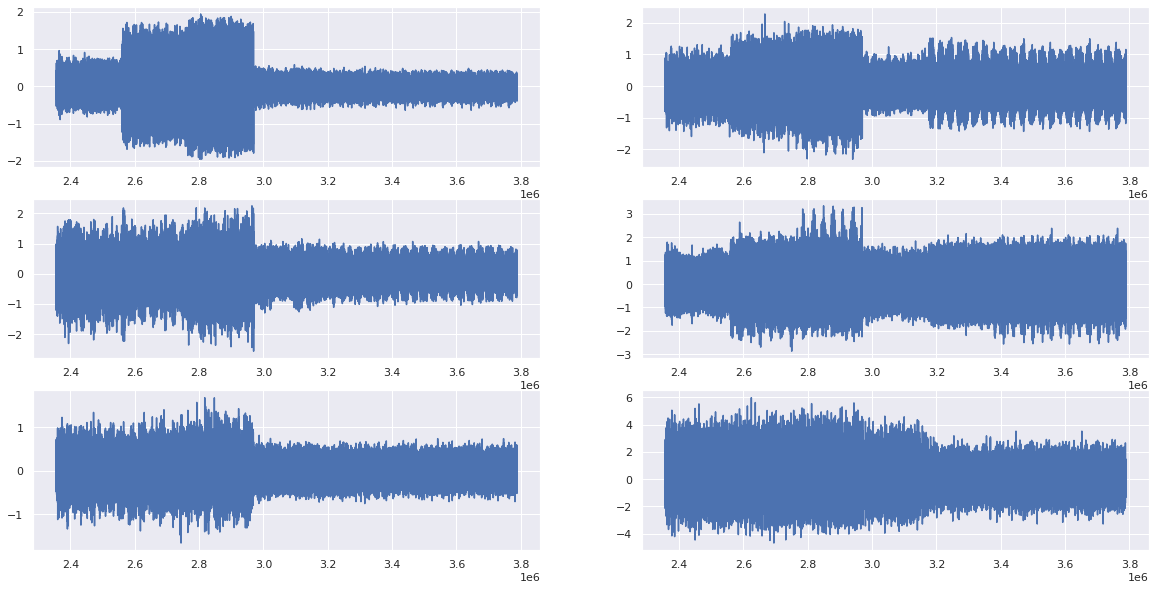

In [12]:
fig , ax = plt.subplots(nrows = 3, ncols =2, figsize=(20,10))

#You can modify which category to plot, or delete "data['category']==i" and see all the categories
ax[0,0].plot(data[ (data['category']>27)]['s1'])
ax[0,1].plot(data[ (data['category']>=28)]['s2'])
ax[1,0].plot(data[ (data['category']>=28)]['s3'])
ax[1,1].plot(data[ (data['category']>=28)]['s4'])
ax[2,0].plot(data[ (data['category']>=28)]['s5'])
ax[2,1].plot(data[ (data['category']>=28)]['s6'])

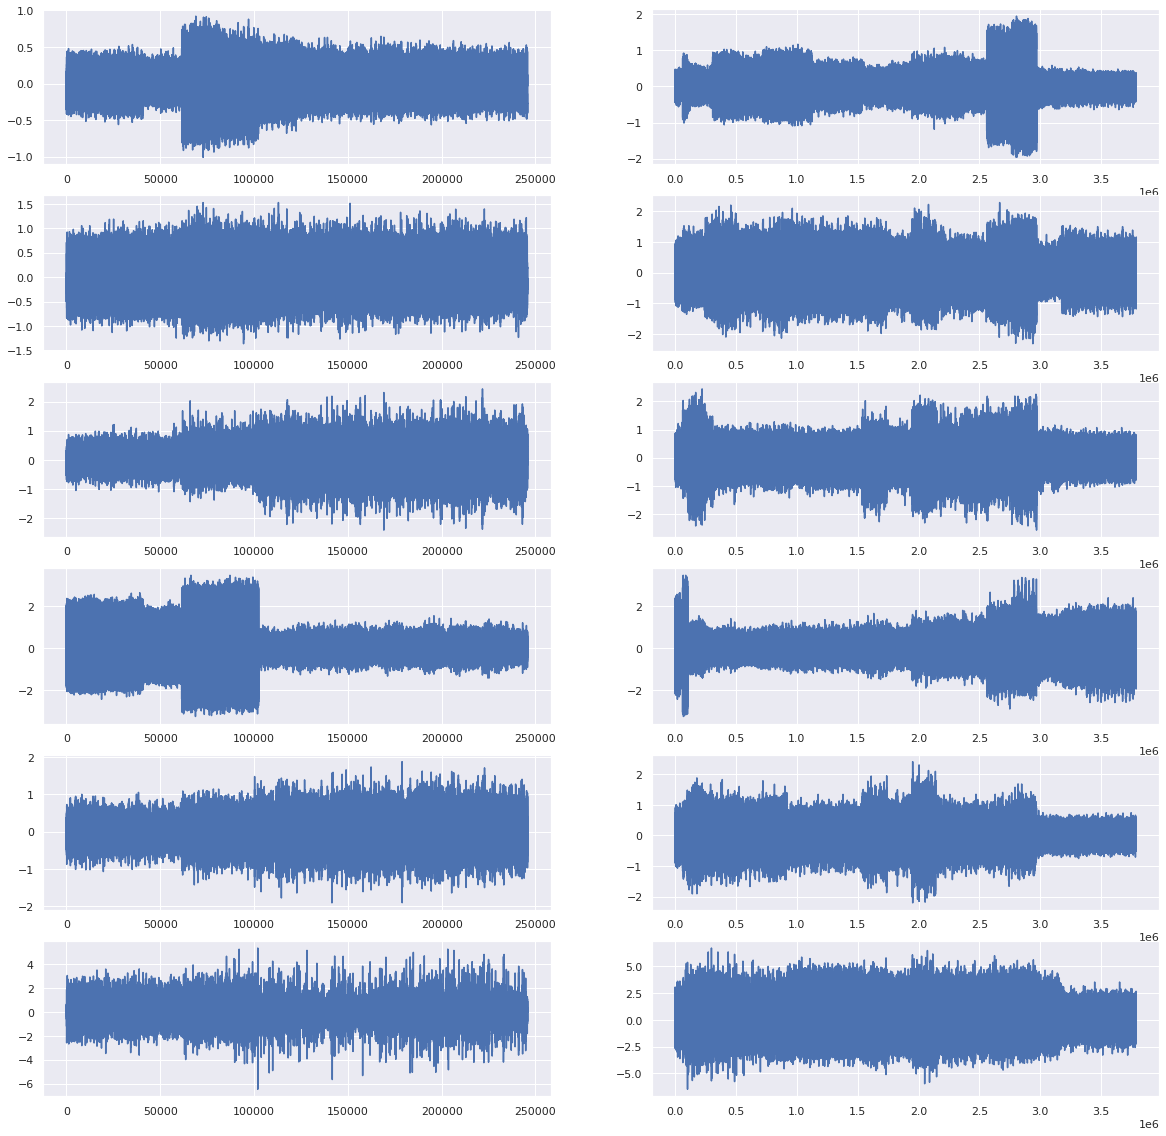

In [13]:
fig , ax = plt.subplots(nrows = 6, ncols =2, figsize=(20,20))

#You can modify which category to plot, or delete "data['category']==i" and see all the categories
ax[0,0].plot(df1['s1'])
ax[0,1].plot(df2['s1'])
ax[1,0].plot(df1['s2'])
ax[1,1].plot(df2['s2'])
ax[2,0].plot(df1['s3'])
ax[2,1].plot(df2['s3'])
ax[3,0].plot(df1['s4'])
ax[3,1].plot(df2['s4'])
ax[4,0].plot(df1['s5'])
ax[4,1].plot(df2['s5'])
ax[5,0].plot(df1['s6'])
ax[5,1].plot(df2['s6'])

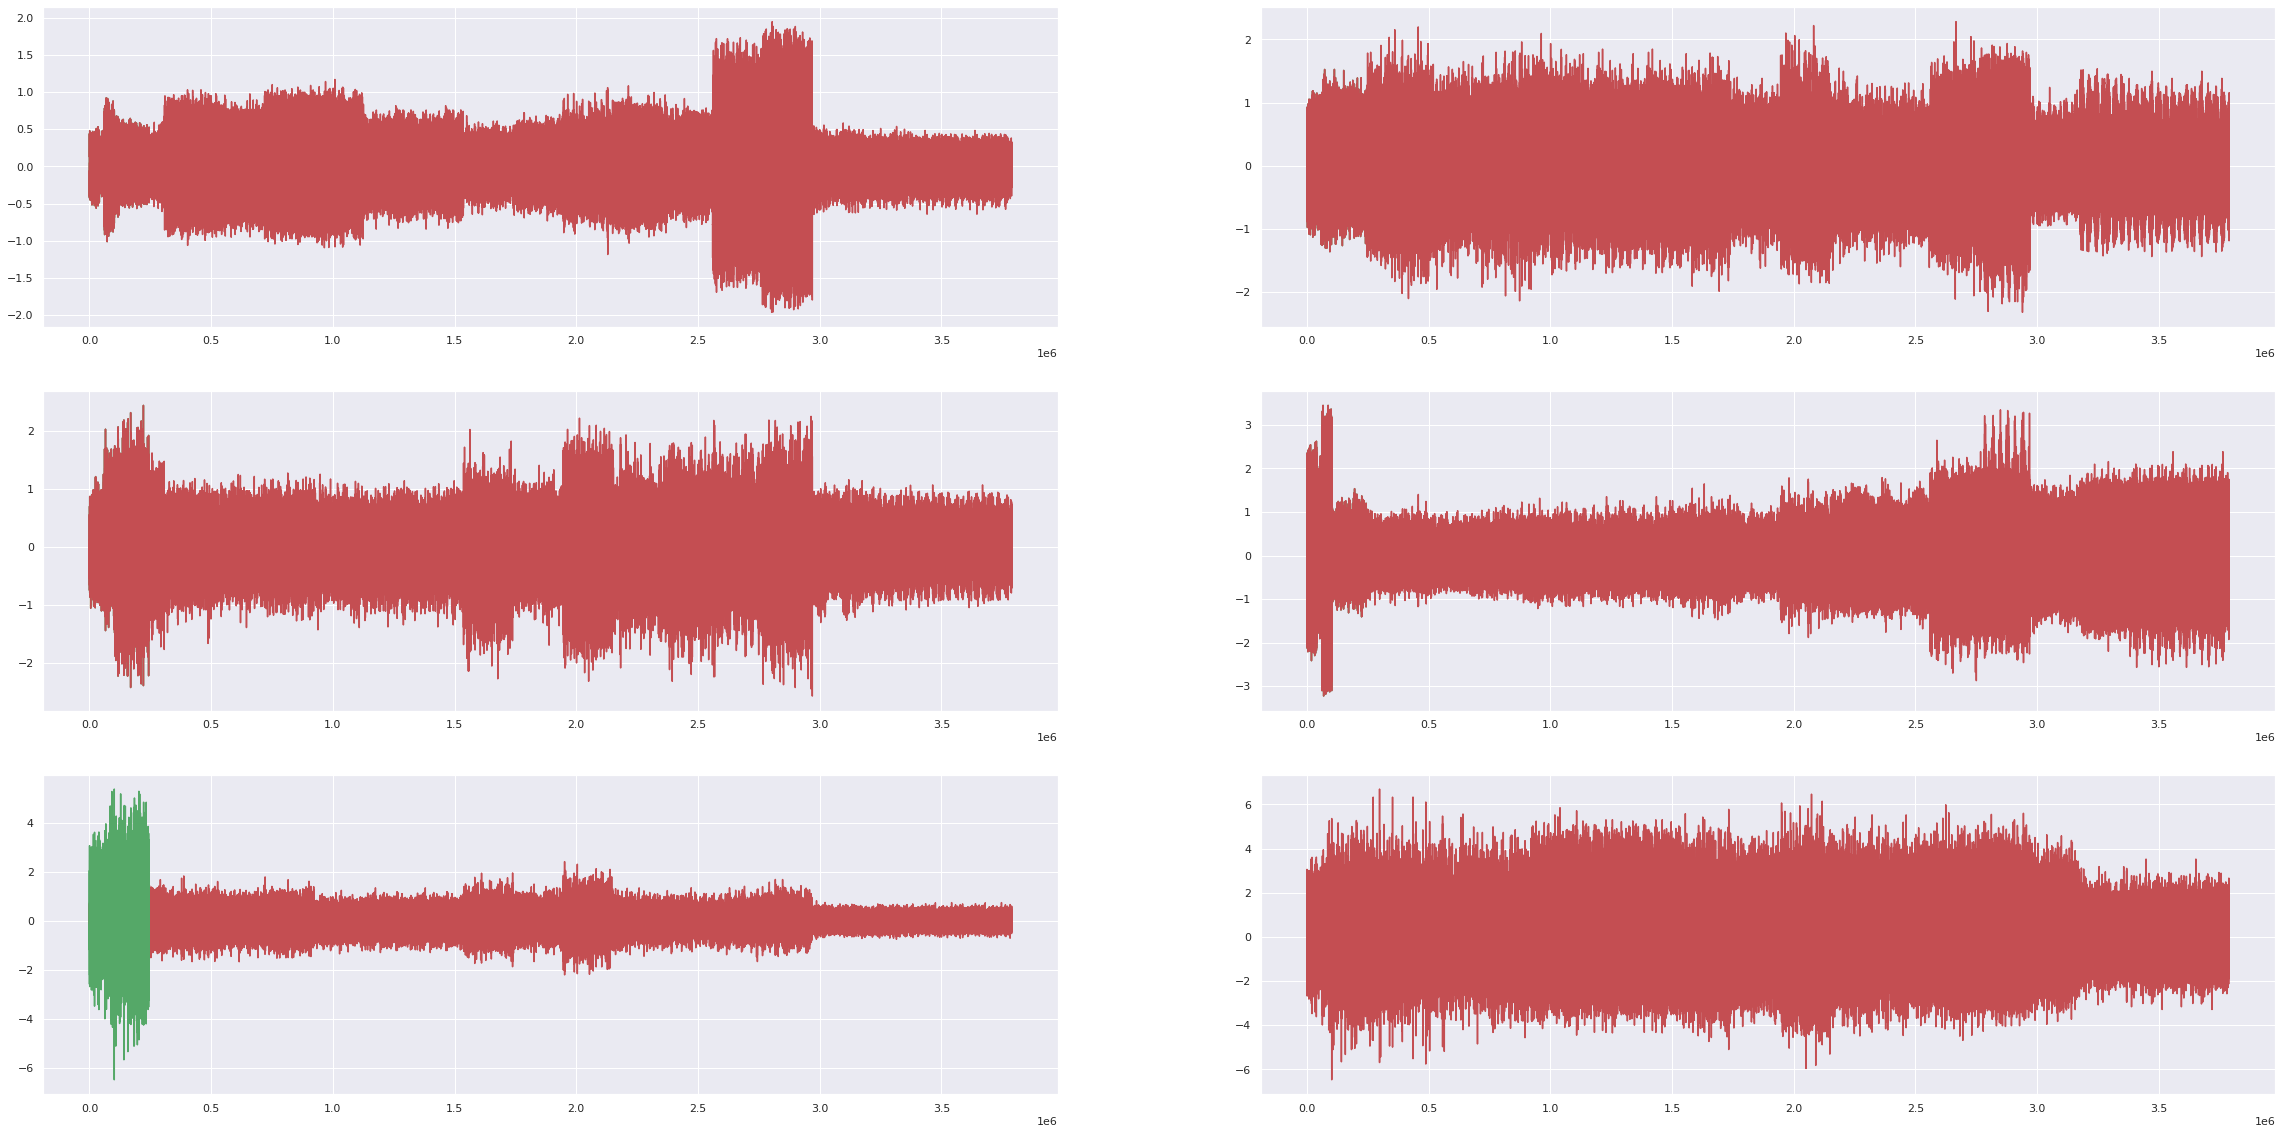

In [14]:
fig , ax = plt.subplots(nrows = 3, ncols =2, figsize=(40,20))

#You can modify which category to plot, or delete "data['category']==i" and see all the categories
ax[0,0].plot(df1['s1'],c = "g")
ax[0,0].plot(df2['s1'],c ="r")
ax[0,1].plot(df1['s2'],c="g")
ax[0,1].plot(df2['s2'],c="r")
ax[1,0].plot(df1['s3'],c="g")
ax[1,0].plot(df2['s3'],c="r")
ax[1,1].plot(df1['s4'],c="g")
ax[1,1].plot(df2['s4'],c="r")
ax[2,0].plot(df1['s5'],c="g")
ax[2,0].plot(df2['s5'],c="r")
ax[2,0].plot(df1['s6'],c="g")
ax[2,1].plot(df2['s6'],c="r")

###### Graphs and correlation matrix
Here we can see that the period >= 27 category hass higher vibration and non stable variation, so we can conform that the period that we have in loggs is true

Here, the correlation matrix, it helps to avoid deux features that gives the same informations, i explain : if you have two variables highly correlated, you can drop one of them.

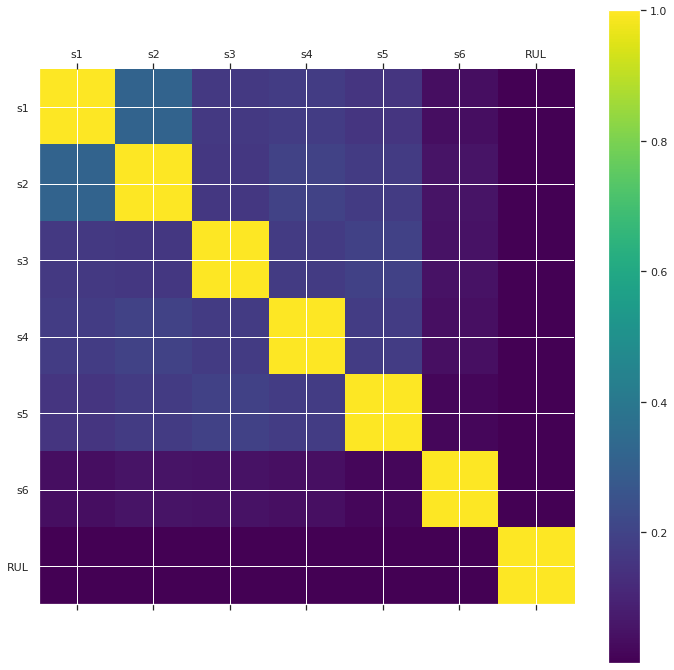

In [15]:
# import plotly.express as px
# corr = data.corr()
# fig = px.imshow(corr,
#                 labels=dict(color="Correlation"),
#                 x=corr.columns,
#                 y=corr.columns
#                )
# fig.update_layout(autosize=False, width=1000, height=800)
# fig.show()

from matplotlib import cm

corr_df = np.zeros((data.shape[1] - 3, data.shape[1] - 3), dtype=np.float32)

unique_categories = sorted(data['category'].unique())

for category in unique_categories:
  subset_df_for_category = data.loc[data['category'] == category]
  corr_df += np.abs(subset_df_for_category.iloc[:,2:-1].corr(method='pearson'))

corr_df = corr_df / len(unique_categories)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1)

corr_ax = ax.matshow(corr_df, cmap=cm.get_cmap('viridis'))
corr_bar = fig.colorbar(corr_ax)

column_names = data.iloc[:,2:-1].columns.values.tolist()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 
ax.set_xticks((0, 1, 2, 3, 4, 5, 6))
ax.set_yticks((0, 1, 2, 3, 4, 5, 6))

ax.set_xticklabels(column_names)
ax.set_yticklabels(column_names)

plt.show()

## Distribution des données

In [16]:
!pip install colormap easydev

In [17]:
import colorsys
from colormap import rgb2hex
unique_categories = sorted(data['category'].unique())

huePartition = 1.0 / (len(unique_categories) + 1) 
machine_colors = {}

for category in unique_categories:
  tuple_rgb_color = tuple([int(channel * 255) for channel in list(colorsys.hsv_to_rgb(huePartition * category, 1.0, 1.0))])
  machine_colors[category] = rgb2hex(tuple_rgb_color[0], tuple_rgb_color[1], tuple_rgb_color[2])

In [18]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
results = pca.fit_transform(data.iloc[:, 2:-1])

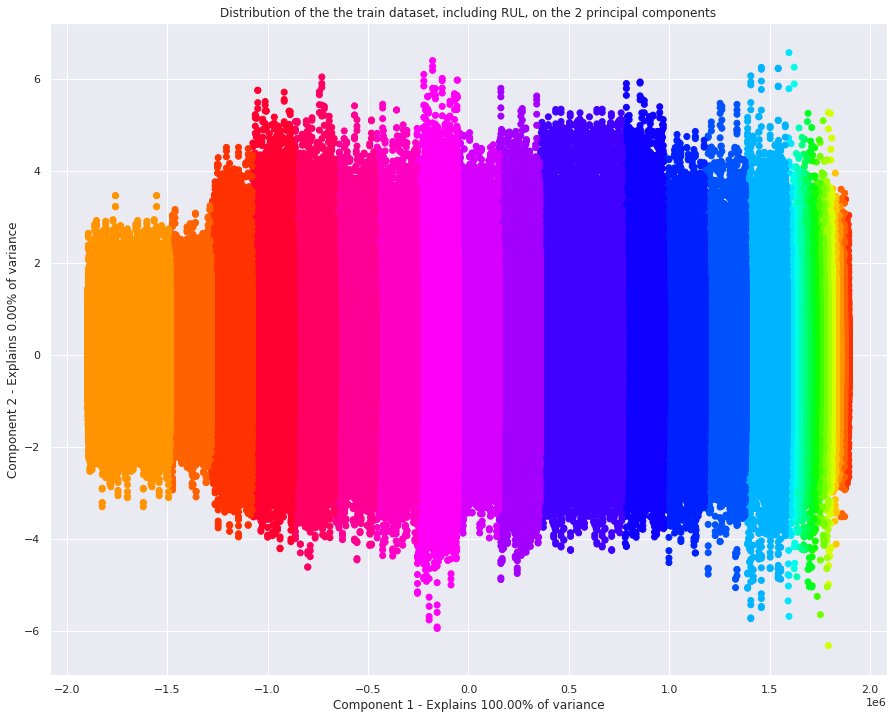

In [19]:
lst_colors = [machine_colors[category] for category in data["category"].to_list()]

plt.figure(figsize=(15, 12))
plt.scatter(results[:,0], results[:,1], c=lst_colors)
plt.title("Distribution of the the train dataset, including RUL, on the 2 principal components")
plt.xlabel(f"Component 1 - Explains " + "{:.2f}".format(pca.explained_variance_ratio_[0] * 100.0) + "% of variance")
plt.ylabel(f"Component 2 - Explains " + "{:.2f}".format(pca.explained_variance_ratio_[1] * 100.0) + "% of variance")
plt.show()

On peut voir ici que la la colonne "category" représente les différents jours de la série, pour lesquelles les données varient d'un jour à l'autre.

# RUL 

###### Definition of RUL
For the RUL, it should be = 0 exactly when the failure has just occure, in our case its the first point of the 28 day. So we should delete ALL the periode of THE FAILURE (second point of 28 to the end), and take the 0 in the first point of the failure. We will do this so that the model takes the value 0 for the RUL in one point (first point of day 28).
By doing this we gain a value RUL =0 in the right place , and we will avoid to put values of the RUL > 0 in the failure period. 
We can do another thing, give to all points in the failure period a 0 value, but this will give to the model alot of points with value=0. But in this case, the model will be confused between all those same values (regression problems we avoid redandant values as much as possible)

In [20]:
# I want to know the index of the 28 day ( first day of the failure so i can drop what befor it).
# I run this and take the index manually (the lazzy one hahaha)

data[data["category"] == 22]

,cycle,category,s1,s2,s3,s4,s5,s6,RUL,label1
1126400,1126401,22.0,-0.385132,0.278320,0.371933,-0.322800,-0.420837,0.078812,2662399,0
1126401,1126402,22.0,-0.370483,0.257568,0.425339,-0.388794,-0.359879,-0.203476,2662398,0
1126402,1126403,22.0,-0.353622,0.236511,0.420532,-0.445023,-0.294113,-0.533600,2662397,0
1126403,1126404,22.0,-0.325546,0.234146,0.454102,-0.466461,-0.245667,-0.884399,2662396,0
1126404,1126405,22.0,-0.296707,0.232849,0.521393,-0.444412,-0.209427,-1.178970,2662395,0
...,...,...,...,...,...,...,...,...,...,...
1535995,1535996,22.0,0.216827,0.218430,0.208740,-0.397644,0.324860,0.390244,2252804,0
1535996,1535997,22.0,0.219727,0.217896,0.238495,-0.351944,0.337448,0.206833,2252803,0
1535997,1535998,22.0,0.221481,0.230865,0.244446,-0.296021,0.366745,0.102005,2252802,0
1535998,1535999,22.0,0.235291,0.238113,0.219727,-0.250854,0.402603,0.060577,2252801,0


In [21]:
# Take the data before that index
# 2355200 is the index of the 28 day where the failure occured

data = data[data.index <= 2355200]

In [22]:
# Turn the first day of the failure into a 27 so we delete all the 28 in the dataset
data.at[2355200, 'category'] = 27

### The problem of frequency
Working with this frequency is not practical, for many reasons. For the predictive maintenance, We want alot of FAILURES and not alot of data points from the same failure. Taking the RUL for each half a second, gives us alot of unuseful data, this because it comes from the same degradation path. Any predictive model try to catch and follow the degradation of the equipement, in others words a different state of it. So alot of data point from the same state will just complicate the camputational time, and add a redandant values which biased the model and confuse it. Also, big number of rows in the same path will provide us a HUGE VALUES FOR THE RUL. And the model will not be able to predict them. Another reason is the running time needed in an LSTM model, it needs alot of computational time, and this is positively correlated with the amount of data. 

So, I will reduce the amount of data by taking approximately one minute frequency, in other words : well separated 24*60*60=1440 data point in a day. In the future when you will have more failures, and there is bit long period between each, you can try to take a frequency of 15min or mooore if the period between each failure is big, this will make the degradation between consecutive points more clear for the model.

Also, we will try to take approximately the same frequency from each day

In [23]:
#####  So here we are taking the same frequency over all the failures' periods.

In [24]:
# This helps to see the days frequency easily

data.groupby("category").count()

,cycle,s1,s2,s3,s4,s5,s6,RUL,label1
category,,,,,,,,,
1.0,20480,20480,20480,20480,20480,20480,20480,20480,20480
2.0,20480,20480,20480,20480,20480,20480,20480,20480,20480
3.0,20480,20480,20480,20480,20480,20480,20480,20480,20480
4.0,20480,20480,20480,20480,20480,20480,20480,20480,20480
6.0,20480,20480,20480,20480,20480,20480,20480,20480,20480
7.0,20480,20480,20480,20480,20480,20480,20480,20480,20480
8.0,20480,20480,20480,20480,20480,20480,20480,20480,20480
9.0,20480,20480,20480,20480,20480,20480,20480,20480,20480
10.0,20480,20480,20480,20480,20480,20480,20480,20480,20480


In [25]:
# The values here, are taken manually from each day  : We split over the days that have 

df1 = data[data.index < 307200].reset_index(drop = True)

df2 = data[(307200 <= data.index) & (data.index < 1126400)].reset_index(drop = True)

df3 = data[data["category"]==22].reset_index(drop = True)

df4 = data[1535999 < data.index].reset_index(drop = True)

In [26]:
#This is a function, that i wrote my self, which take a well separated range of data for a data frame
def take_min(df,b):
    a = []
    c = [0]
    c = c + list(df['category'].unique())
    for i in range(1 ,len(c)):
        a = a + list(np.arange(len(df[df['category']==c[i-1]].index)*(i-1), len(df[df['category']==c[i]].index)*i, b))
    return df.loc[a]

In [27]:
# Apply the function for ech dataframe of the same frequency using the appropriate ratio to obtain 1440 values

df1 = take_min(df1, 14)
df2 = take_min(df2, 142)
df3 = take_min(df3, 284)
df4 = take_min(df4, 142)

In [28]:
# We concatenate the 4 subsets

data = pd.concat([df1,df2,df3,df4])
data.sort_values("category", inplace = True)
data.reset_index(drop = True, inplace = True)

In [29]:
data.groupby("category").count()

,cycle,s1,s2,s3,s4,s5,s6,RUL,label1
category,,,,,,,,,
1.0,1463,1463,1463,1463,1463,1463,1463,1463,1463
2.0,1463,1463,1463,1463,1463,1463,1463,1463,1463
3.0,1463,1463,1463,1463,1463,1463,1463,1463,1463
4.0,1463,1463,1463,1463,1463,1463,1463,1463,1463
6.0,1463,1463,1463,1463,1463,1463,1463,1463,1463
7.0,1463,1463,1463,1463,1463,1463,1463,1463,1463
8.0,1463,1463,1463,1463,1463,1463,1463,1463,1463
9.0,1463,1463,1463,1463,1463,1463,1463,1463,1463
10.0,1463,1463,1463,1463,1463,1463,1463,1463,1463


###### Cycles and RUL :
Now, i will redefine my cycles and RUL because i changed the frequency. There is a difference of 1 between cycles and RUL, just because i want my RUL to be 0 at the end, and the cycles begin with 1 (miningful)

In [30]:
data['cycle'] = np.arange(1,len(data.index)+1)
data['RUL'] = np.arange(len(data.index)-1, -1,-1)

##### Percentage of RUL:
A nice trick is to predict the percentage of RUL, and not the RUL itself. Because if we take the RUL is will provide us a very big values so the model could not predict them. And Also to provide a stable weights in the LSTM.
In a point of time if you want to know the integer value of the RUL at this time, you need to compute :

    1) RUL = (predicted_percentage / (predicted_percentage -1)) * cycle

In [31]:
# transfomr the RUL into a percentage
data['RUL'] = data['RUL'] / data.at[0, "RUL"]

In [32]:
### Drop the label because i don't need it here and I changed the values in category for the 28 day to 27 because 
###i neede it for the code, not a big deal

data.drop('label1', axis = 1, inplace = True)

### Know our data is ready for prediction (we don't have any missing values or outliers so we are fine)

###### Split the data 

The data that we picked in the first presentation of the project was very bad. It's the raw Industrial data, so we passed several days to figure out why our models do not work properly. Finally, we tried our models on a new data (Not predictive maintenance) and the model implementation was fine. So we tried to find other datasets, but the same problem occurs. Finally, we found a real dataset, we talked with the owner and explained a bit the dataset to us. But, there was a problem.

###### PROBLEM
In the splitting of the dataset, WE SHOULD ALWAYS SPLIT BY FAILURES AND NOT IN THE SAME FAILURE PATH. But here we do have just one failure. And splitting in the same failure is not practical, and leads to a non trust results. Here I am forced to split on just one failure. What we did, is we split randomely and separated days to test the model in them which is not a good split, reason : THEY BELONG TO THE SAME FAILURE OF THE TRAIN but we will test over different periods of the time.

In [33]:
# Take days 2,8,15,26 for the test
test_data = data[(data["category"]==2)|(data["category"]==8)|(data["category"]==15)|(data["category"]==26)]

In [34]:
train_data= data.loc[list(set(list(data.index))-set(test_data.index))]

In [35]:
train_inputs = train_data[["s1","s2","s3","s4","s5","s6"]]
test_inputs = test_data[["s1","s2","s3","s4","s5","s6"]]
train_output = train_data['RUL']
test_output = test_data["RUL"]

# Prédiciton du RUL avec LM + ARIMA

In [36]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(train_inputs, train_output)
train_rul_preds = lm.predict(train_inputs)

In [37]:
test_rul_preds = lm.predict(test_inputs)

Text(0.5, 1.0, 'Test')

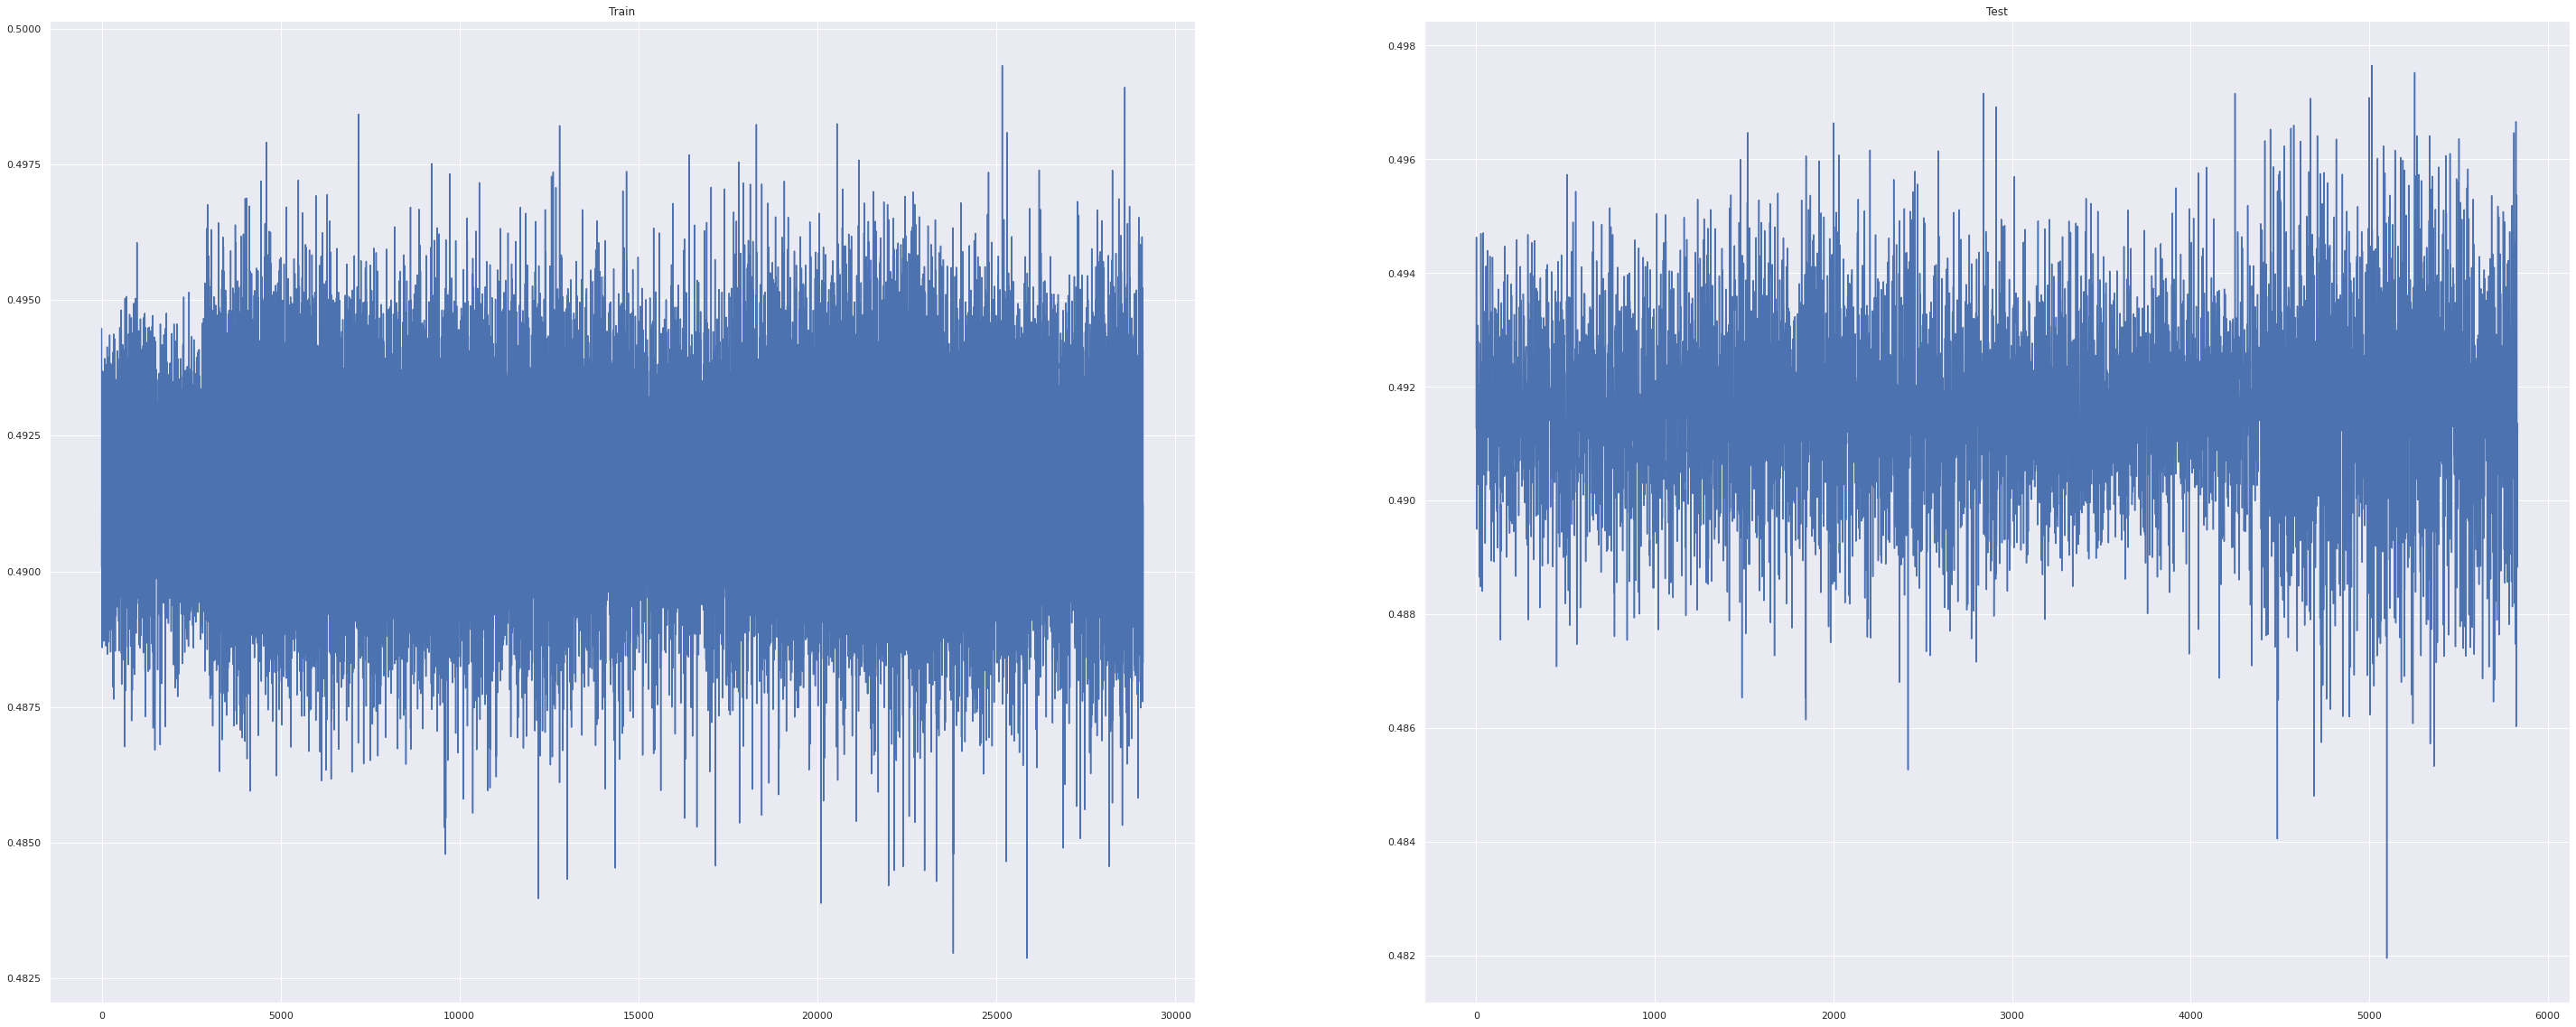

In [38]:
import matplotlib
import matplotlib.pyplot as plt
import math
import scipy


matplotlib.pyplot.rcParams['agg.path.chunksize'] = 20000

fig, axs = plt.subplots(1, 2, figsize=(50,20))

matplotlib.rcParams.update({'font.size': 22})

axs[0].plot(list(range(len(train_rul_preds))), train_rul_preds)
axs[0].set_title("Train")

axs[1].plot(list(range(len(test_rul_preds))), test_rul_preds)
axs[1].set_title("Test")

In [39]:
!pip install pmdarima

In [147]:
%%time
from pmdarima import auto_arima
import math
import matplotlib.pyplot as plt
import sklearn

train_preds = np.zeros((int(train_rul_preds.shape[0] * 0.2),), dtype=np.int32)

threshold = 0.4835

for i in range(5):
  train_size = int(train_rul_preds.shape[0] * 0.2)
  train_partition, valid_partition = train_rul_preds[i * train_size: (i + 1) * train_size], train_rul_preds[(i + 1) * train_size: (i + 2) * train_size]

  arima_model = auto_arima(train_partition, d=1, trace=True, error_action="ignore", suppress_warnings=True)

  RUL = None
  max_horizon = train_size
  # Basé sur l'exemple ici : https://kmutya.github.io/predmaintenance/
  for i in range(1, max_horizon, 100):
    arima_predictions = arima_model.predict(n_periods=i)

    if arima_predictions[i - 1] <= threshold:
      RUL = i
      break

  if RUL is None:
    RUL = max_horizon
  
  print(RUL)

  valid_partition_preds = np.arange(RUL - valid_partition.shape[0], RUL)
  print(valid_partition_preds.shape)
  
  train_preds = np.concatenate((train_preds, valid_partition_preds[::-1]), axis=0)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-56851.054, Time=17.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-55243.797, Time=1.91 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-56193.822, Time=1.49 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-56963.006, Time=6.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-55245.795, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-57424.649, Time=5.97 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-55237.790, Time=3.68 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-57840.829, Time=7.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-57856.070, Time=3.03 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-57315.419, Time=13.97 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-56057.405, Time=4.44 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-57858.556, Time=1.92 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-56965.092, Time=0.92 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-57843.121, Time=1.47 sec
 AR

In [148]:
train_preds.shape

(29100,)

In [149]:
from sklearn.metrics import r2_score

mse_train = sklearn.metrics.mean_squared_error(train_output[int(train_preds.shape[0] * 0.2):], train_preds[int(train_preds.shape[0] * 0.2):])
print("LM + ARIMA MSE Train : " + str(mse_train))

mae_train = sklearn.metrics.mean_absolute_error(train_output[int(train_preds.shape[0] * 0.2):], train_preds[int(train_preds.shape[0] * 0.2):])
print("LM + ARIMA MAE Train : " + str(mae_train))

r_squared_train = r2_score(train_output[int(train_preds.shape[0] * 0.2):], train_preds[int(train_preds.shape[0] * 0.2):])
print("LM + ARIMA R Squared Train : " + str(r_squared_train))

LM + ARIMA MSE Train : 11285407.30894364
LM + ARIMA MAE Train : 2909.1069650824147
LM + ARIMA R Squared Train : -234891121.43626344


In [155]:
%%time
from pmdarima import auto_arima
import math
import matplotlib.pyplot as plt
import sklearn

test_preds = np.zeros((int(test_rul_preds.shape[0] * 0.2),), dtype=np.int32)

threshold = 0.4835

for i in range(4):
  test_size = int(test_rul_preds.shape[0] * 0.2)
  test_partition, valid_partition = test_rul_preds[i * test_size: (i + 1) * test_size], test_rul_preds[(i + 1) * test_size: (i + 2) * test_size]

  arima_model = auto_arima(test_partition, d=1, trace=True, error_action="ignore", suppress_warnings=True)

  RUL = None
  max_horizon = test_size
  # Basé sur l'exemple ici : https://kmutya.github.io/predmaintenance/
  for i in range(1, max_horizon, 100):
    arima_predictions = arima_model.predict(n_periods=i)

    if arima_predictions[i - 1] <= threshold:
      RUL = i
      break

  if RUL is None:
    RUL = max_horizon

  print(RUL)
  valid_partition_preds = np.arange(RUL - valid_partition.shape[0], RUL)
  print(valid_partition_preds.shape)
  test_preds = np.concatenate((test_preds, valid_partition_preds[::-1]), axis=0)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-11912.274, Time=3.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11428.630, Time=0.51 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11590.898, Time=0.47 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11709.017, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11430.628, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-11853.625, Time=2.50 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-10772.487, Time=4.33 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-11961.276, Time=8.78 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-11742.430, Time=2.86 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-11869.853, Time=2.49 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-11732.277, Time=3.69 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-11898.006, Time=1.33 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-11797.374, Time=1.19 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-11747.610, Time=2.95 sec
 ARIM

In [156]:
test_preds.shape

(5830,)

In [158]:
from sklearn.metrics import r2_score

mse_test = sklearn.metrics.mean_squared_error(test_output[int(test_preds.shape[0] * 0.2) + 2:], test_preds[int(test_preds.shape[0] * 0.2):])
print("LM + ARIMA MSE Test : " + str(mse_test))

mae_test = sklearn.metrics.mean_absolute_error(test_output[int(test_preds.shape[0] * 0.2) + 2:], test_preds[int(test_preds.shape[0] * 0.2):])
print("LM + ARIMA MAE Test : " + str(mae_test))

r_squared_test = r2_score(test_output[int(test_preds.shape[0] * 0.2) + 2:], test_preds[int(test_preds.shape[0] * 0.2):])
print("LM + ARIMA R Squared Test : " + str(r_squared_test))

LM + ARIMA MSE Test : 452036.34509283636
LM + ARIMA MAE Test : 582.058547571338
LM + ARIMA R Squared Test : -5321892.92938624


### Random Forest

In [ ]:
rfr = RandomForestRegressor()

rfr.fit(train_inputs, train_output)

RandomForestRegressor()

##### This plot is an importance plot which shows the importance of each feature in the prediction effort

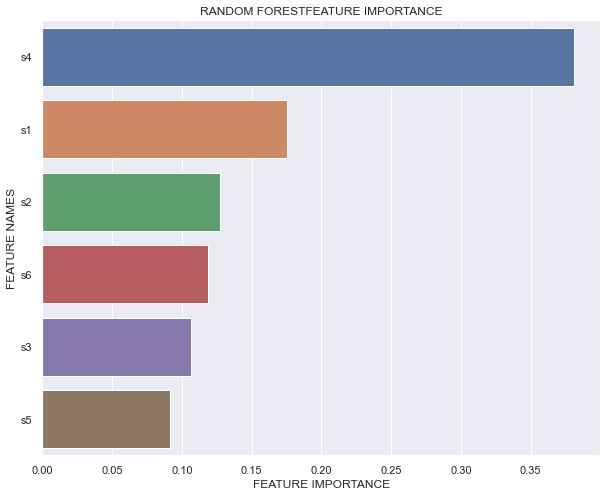

In [ ]:
def plot_feature_importance(importance,names,model_type) :
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
plot_feature_importance(rfr.feature_importances_,train_inputs.columns,'RANDOM FOREST')

In [ ]:
rfr_pred = rfr.predict(train_inputs)
print('The explained variance score is : ', explained_variance_score(train_output, rfr_pred))
print('The max error is : ', max_error(train_output, rfr_pred))
print('The mean absolute error is : ', mean_absolute_error(train_output, rfr_pred))
print('The mean squared error is : ', mean_squared_error(train_output, rfr_pred))
print('The root mean squared error is : ', np.sqrt(mean_squared_error(train_output, rfr_pred)))
print('The r**2 score is : ', r2_score(train_output, rfr_pred))

The explained variance score is :  0.9159923758735669
The max error is :  0.4024187684291889
The mean absolute error is :  0.06030694495313834
The mean squared error is :  0.006551942492099173
The root mean squared error is :  0.08094407014784451
The r**2 score is :  0.9159922176582403


In [ ]:
t_rfr_pred = rfr.predict(test_inputs)
print('The explained variance score is : ', explained_variance_score(test_output, t_rfr_pred))
print('The max error is : ', max_error(test_output, t_rfr_pred))
print('The mean absolute error is : ', mean_absolute_error(test_output, t_rfr_pred))
print('The mean squared error is : ', mean_squared_error(test_output, t_rfr_pred))
print('The root mean squared error is : ', np.sqrt(mean_squared_error(test_output, t_rfr_pred)))
print('The r**2 score is : ', r2_score(test_output, t_rfr_pred))

The explained variance score is :  0.3986562035983138
The max error is :  0.8563717042168848
The mean absolute error is :  0.2033290113207307
The mean squared error is :  0.06514356983962857
The root mean squared error is :  0.2552323839947207
The r**2 score is :  0.3962239875696605


## ExtraTrees

In [ ]:
model = ExtraTreesRegressor()
model.fit(train_inputs, train_output)

etr_pred = model.predict(train_inputs)
print('The max error is : ', max_error(train_output, etr_pred))
print('The mean absolute error is : ', mean_absolute_error(train_output, etr_pred))
print('The mean squared error is : ', mean_squared_error(train_output, etr_pred))
print('The root mean squared error is : ', np.sqrt(mean_squared_error(train_output, etr_pred)))
print('The r**2 score is : ', r2_score(train_output, etr_pred))

The max error is :  2.55351295663786e-15
The mean absolute error is :  5.747479364527055e-16
The mean squared error is :  5.750976209052236e-31
The root mean squared error is :  7.583519109920035e-16
The r**2 score is :  1.0


In [ ]:
t_etr_pred = model.predict(test_inputs)

print('The max error is : ', max_error(test_output, t_etr_pred))
print('The mean absolute error is : ', mean_absolute_error(test_output, t_etr_pred))
print('The mean squared error is : ', mean_squared_error(test_output, t_etr_pred))
print('The root mean squared error is : ', np.sqrt(mean_squared_error(test_output, t_etr_pred)))
print('The r**2 score is : ', r2_score(test_output, t_etr_pred))

The max error is :  0.8590927829148901
The mean absolute error is :  0.20405922714813945
The mean squared error is :  0.06480754468639506
The root mean squared error is :  0.2545732599594762
The r**2 score is :  0.3993383997456449


## Gradient Boosting

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(train_inputs,train_output)
gbr_pred = gbr.predict(train_inputs)
print('The max error is : ', max_error(train_output,gbr_pred))
print('The mean absolute error is : ', mean_absolute_error(train_output, gbr_pred))
print('The mean squared error is : ', mean_squared_error(train_output, gbr_pred))
print('The root mean squared error is : ', np.sqrt(mean_squared_error(train_output, gbr_pred)))
print('The r**2 score is : ', r2_score(train_output, gbr_pred))

The max error is :  0.8818735827471925
The mean absolute error is :  0.16414307418485413
The mean squared error is :  0.04555812244462052
The root mean squared error is :  0.21344348770721613
The r**2 score is :  0.41586226697775674


In [ ]:
t_gbr_pred = gbr.predict(test_inputs)
print('The max error is : ', max_error(test_output, t_gbr_pred))
print('The mean absolute error is : ', mean_absolute_error(test_output, t_gbr_pred))
print('The mean squared error is : ', mean_squared_error(test_output, t_gbr_pred))
print('The root mean squared error is : ', np.sqrt(mean_squared_error(test_output, t_gbr_pred)))
print('The r**2 score is : ', r2_score(test_output, t_gbr_pred))

The max error is :  0.8703417559736967
The mean absolute error is :  0.20976181948170697
The mean squared error is :  0.06662810609867989
The root mean squared error is :  0.2581242067274588
The r**2 score is :  0.3824647265250962


## Adaboost

In [ ]:
adr = AdaBoostRegressor(DecisionTreeRegressor())
adr.fit(train_inputs, train_output)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor())

In [ ]:
adr_pred = adr.predict(train_inputs)
print('The max error is : ', max_error(train_output, adr_pred))
print('The mean absolute error is : ', mean_absolute_error(train_output, adr_pred))
print('The mean squared error is : ', mean_squared_error(train_output, adr_pred))
print('The root mean squared error is : ', np.sqrt(mean_squared_error(train_output, adr_pred)))
print('The r**2 score is : ', r2_score(train_output, adr_pred))

The max error is :  0.14966648535684635
The mean absolute error is :  0.0045272481704481515
The mean squared error is :  0.00023168046674941004
The root mean squared error is :  0.015221053404722356
The r**2 score is :  0.9970294363470082


In [ ]:
t_adr_pred = adr.predict(test_inputs)
print('The max error is : ', max_error(test_output, t_adr_pred))
print('The mean absolute error is : ', mean_absolute_error(test_output, t_adr_pred))
print('The mean squared error is : ', mean_squared_error(test_output, t_adr_pred))
print('The root mean squared error is : ', np.sqrt(mean_squared_error(test_output, t_adr_pred)))
print('The r**2 score is : ', r2_score(test_output, t_adr_pred))

The max error is :  0.8508488162377258
The mean absolute error is :  0.20009342148517054
The mean squared error is :  0.06580747521621973
The root mean squared error is :  0.25652967706723473
The r**2 score is :  0.3900706536044497


###### Standardization
After the split, we should standardize our features. I explain my self, the inputs should range in the same interval. The deep learning algorithms work by giving weights in each neuron for each feature. So, when we run the models on features that have different ranges of data, this will give high weights to features that have small values, and small ones to the large values fatures. And this will make our model unstable, and gives more importance to some features that we don't know if they actually have a strong explanation of our RUL.

I will use a MinMaxScaler which put all features in the [0,1] intervall

## LSTM

In [ ]:
train_data

,cycle,category,s1,s2,s3,s4,s5,s6,RUL
0,1,1.0,-0.057297,0.003967,-0.539322,1.086807,-0.449371,-1.175232,1.000000
1,2,1.0,0.253830,-0.026627,0.444794,0.621567,-0.089111,-0.440140,0.999971
2,3,1.0,0.338898,0.033264,-0.073013,0.742111,-0.104446,-0.378799,0.999943
3,4,1.0,0.141983,-0.264053,0.106354,-0.826111,0.087433,-0.083618,0.999914
4,5,1.0,-0.036697,0.222626,-0.036469,-1.683121,0.269699,-0.068130,0.999885
...,...,...,...,...,...,...,...,...,...
34927,34928,27.0,-0.439911,-0.030441,-0.005264,0.063934,-0.160904,-0.574417,0.000115
34928,34929,27.0,-0.539856,-0.460587,0.299225,-0.509109,0.283585,-0.101318,0.000086
34929,34930,27.0,0.171204,0.338211,0.430145,-0.156631,0.025101,1.539154,0.000057
34930,34931,27.0,0.809708,0.210037,-0.261536,0.016861,-0.053329,-0.123291,0.000029


In [ ]:
scaler = preprocessing.MinMaxScaler()

cols_scal = train_data.columns.difference(['RUL','category'])

train_set_norm_int = pd.DataFrame(scaler.fit_transform(train_data[cols_scal]),
                                  columns = cols_scal,
                                  index = train_data.index)

train_data = train_data[train_data.columns.difference(cols_scal)].join(train_set_norm_int)

In [ ]:
train_data.describe()

,RUL,category,cycle,s1,s2,s3,s4,s5,s6
count,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000
mean,0.491579,14.006976,0.508421,0.514920,0.487599,0.490727,0.488443,0.456660,0.492833
std,0.279275,7.527955,0.279275,0.146583,0.108434,0.092789,0.110051,0.116095,0.068897
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249571,7.000000,0.250143,0.420426,0.416542,0.434030,0.443200,0.379440,0.456225
50%,0.499714,13.000000,0.500286,0.514533,0.486164,0.491371,0.487833,0.457132,0.492641
75%,0.749857,20.000000,0.750429,0.610116,0.557737,0.547705,0.533129,0.534052,0.528864
max,1.000000,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###### Important thing
You should note, that every transformation (Standardization in our cas) sould be fit just on the train datasets. And for the test set, or when we will implement the project. New data or test set sould be transformated using the same scaler with paramters fitted on the train dataset.

 You can notice in the code for the training data i used "scaler.fit_transform" but for the test i used "scaler.transform"

In [ ]:
cols_scal = test_data.columns.difference(['RUL','category'])

test_set_norm_int = pd.DataFrame(scaler.transform(test_data[cols_scal]),
                                  columns = cols_scal,
                                  index = test_data.index)

test_data = test_data[test_data.columns.difference(cols_scal)].join(test_set_norm_int)

In [ ]:
test_data.describe()

,RUL,category,cycle,s1,s2,s3,s4,s5,s6
count,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000
mean,0.542020,12.704561,0.457980,0.514657,0.487494,0.490653,0.488900,0.456495,0.491331
std,0.328500,8.908999,0.328500,0.099683,0.108823,0.105600,0.103700,0.127112,0.077781
min,0.041310,2.000000,0.041883,0.147672,0.035754,0.078686,0.135122,-0.163693,-0.007456
25%,0.414095,2.000000,0.083615,0.447262,0.415184,0.429840,0.440079,0.377420,0.455010
50%,0.707123,8.000000,0.292877,0.515846,0.482989,0.489375,0.488444,0.453371,0.491587
75%,0.916385,15.000000,0.585905,0.583378,0.559842,0.555298,0.536382,0.535177,0.529914
max,0.958117,26.000000,0.958690,0.939240,1.031952,0.918647,0.883538,1.120930,1.100381


You can see here that the lack of data lead to an element with value >1. Because it the scaler has not see the maximumwhen we split. And this show that this data does not generalize well the stat of the motor

## Sequence Generation

###### LSTM And sequences
LSTM need a 3 dimentional inputs (number of data, sequence_length, number of features), and this because we need the LSTM to take a sequence of data (for example 60minutes of data) and from this sequence predict the RUL for now, this gives him all the informations about tendancies and variations in the data in this period, and this will provide it an idea about the state of the motor. This is the stregth of the LSTM, it takes a degradation period of the motor and from this it can know how much the motor is degradated. For this example i will take 60minutes of data, you can take more if you want. But you pay attention because the computational time will increase. And for the LSTM, the goodness of prediction increased by increasing this sequence length and it remains the same above a certain limit.

In [ ]:
def gen_seq(data, seq_length, columns):
    L=[]
    n = data.shape[0]
    for i in range(0, n - seq_length):
        L.append(data[i:i+seq_length][columns].values)
    return(L)

###### Homogeinity of sequences
A very important thing, the sequence should be homogene, and the points are taken from a continued data. For this, I will take the sequences depending on the category variable. I split each category to sequences, and then concatenante them to one array 

In [ ]:
train_inputs = np.concatenate(np.array([gen_seq(train_data[train_data['category'] == id], 60, ["s1","s2","s3","s4","s5","s6","cycle"])
                               for id in train_data['category'].unique()]))

/var/folders/jr/6bl3ws9s2g7d8nwbs6rgtpb40000gn/T/ipykernel_24311/3944128752.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_inputs = np.concatenate(np.array([gen_seq(train_data[train_data['category'] == id], 60, ["s1","s2","s3","s4","s5","s6","cycle"])


In [ ]:
train_inputs.shape

(27900, 60, 7)

In [ ]:
test_inputs = np.concatenate(np.array([gen_seq(test_data[test_data['category'] == id], 60, ["s1","s2","s3","s4","s5","s6","cycle"])
                               for id in test_data['category'].unique()]))

/var/folders/jr/6bl3ws9s2g7d8nwbs6rgtpb40000gn/T/ipykernel_24311/74823833.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_inputs = np.concatenate(np.array([gen_seq(test_data[test_data['category'] == id], 60, ["s1","s2","s3","s4","s5","s6","cycle"])


In [ ]:
test_inputs.shape

(5592, 60, 7)

In [ ]:
def gen_labels(id_df, seq_length, label):
    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length:num_elements]

In [ ]:
train_out = np.concatenate(np.array([gen_labels(train_data[train_data['category'] == id], 60, ["RUL"])
                               for id in train_data['category'].unique()]))

/var/folders/jr/6bl3ws9s2g7d8nwbs6rgtpb40000gn/T/ipykernel_24311/3760531295.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_out = np.concatenate(np.array([gen_labels(train_data[train_data['category'] == id], 60, ["RUL"])


In [ ]:
train_out.shape

(27900,)

In [ ]:
test_out = np.concatenate(np.array([gen_labels(test_data[test_data['category'] == id], 60, ["RUL"])
                               for id in test_data['category'].unique()]))

/var/folders/jr/6bl3ws9s2g7d8nwbs6rgtpb40000gn/T/ipykernel_24311/4064557334.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_out = np.concatenate(np.array([gen_labels(test_data[test_data['category'] == id], 60, ["RUL"])


In [ ]:
test_out.shape

(5592,)

###### Learning rate determination
Without any details, the LSTM has a learning rate to determine. the learning rate determines how fast and how good the training process will be. So we take a number of iteration (21 in this cas) to run the model and for each iteration we change the learning rate and see how the error will act. We take the learning rate with the minimum error

In [ ]:
#This is the LSTM model
tf.keras.backend.clear_session()

nb_features = train_inputs.shape[2]
sequence_length  = train_inputs.shape[1]

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, input_shape = (sequence_length, nb_features), return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'relu')
])

lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 10**-7 * 10**(epoch/3))

model.compile(loss=tf.keras.losses.Huber(), optimizer = tf.keras.optimizers.Adam(lr = 10**-7), metrics =['mse','mae'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            18432     
                                                                 
 dropout (Dropout)           (None, 60, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30,881
Trainable params: 30,881
Non-trainable params: 0
_________________________________________________________________


### Vous ouvez l'ajouter dans l'article : On fait ça pour avoir une idée sur le taux d'apprentissage à utiliser.

In [ ]:
# Here we fit the model on the training dataset
history = model.fit(train_inputs, train_out, epochs = 21, callbacks = [lr])

Epoch 1/21


2022-04-30 01:30:11.934077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 01:30:12.271447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 01:30:12.431221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 01:30:12.672747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 01:30:13.023678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


872/872 [==============================] - 38s 41ms/step - loss: 17143.1914 - mse: 389051872.0000 - mae: 17143.6992 - lr: 1.0000e-07
Epoch 2/21
391/872 [============>.................] - ETA: 20s - loss: 17047.9902 - mse: 384118112.0000 - mae: 17048.4902

KeyboardInterrupt: 

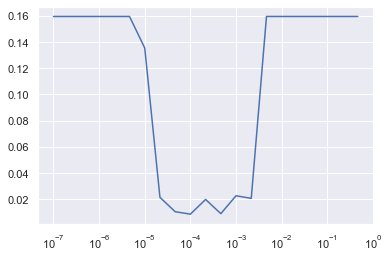

In [ ]:
#We plot the loss to determine the appropriate learning rate
loss = history.history['loss']
Lr = history.history['lr']

plt.semilogx(Lr, loss)

We take the learning rate with the smallest error : lr = 10-3

#### Our Model

This is our Model, not very complexe. You can add more complexity if the data is very complex by adding a line like the line "1" (see code), and change the number of neurons "64". return_sequences is used when we have more layers (line 1), if we will pass to the dense layer (line"2") we don't write it. Also you can increase in your "epochs" parameters( line"3") to add more itertions and ore details.

In [ ]:
tf.keras.backend.clear_session()

nb_features = train_inputs.shape[2]
sequence_length  = train_inputs.shape[1]
nb_out = train_out.shape[1]

lstm_model = tf.keras.models.Sequential([
    # "1" 
    tf.keras.layers.LSTM(64, input_shape = (sequence_length, nb_features), return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.2),
    #"2"
    tf.keras.layers.Dense(1, activation = 'relu')
])

lstm_model.compile(loss=tf.keras.losses.Huber(), optimizer = tf.keras.optimizers.Adam(lr = 10**-3), metrics =['mse','mae'])
    # "3"
history = lstm_model.fit(train_inputs, train_out, epochs = 5)

Epoch 1/5


/opt/homebrew/Caskroom/miniforge/base/envs/mouhcine/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-04-30 02:30:39.687942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 02:30:39.895058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 02:30:40.010868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 02:30:40.158080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 02:30:40.336152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is en

872/872 [==============================] - 37s 41ms/step - loss: 0.0289 - mse: 0.0577 - mae: 0.1957
Epoch 2/5
872/872 [==============================] - 36s 42ms/step - loss: 0.0363 - mse: 0.0727 - mae: 0.2272
Epoch 3/5
872/872 [==============================] - 36s 42ms/step - loss: 0.0327 - mse: 0.0655 - mae: 0.2148
Epoch 4/5
872/872 [==============================] - 36s 42ms/step - loss: 0.0185 - mse: 0.0369 - mae: 0.1479
Epoch 5/5
872/872 [==============================] - 36s 42ms/step - loss: 0.0021 - mse: 0.0041 - mae: 0.0496


##### Evaluation on the training datase.

In [ ]:
lstm.evaluate(train_inputs, train_out)

2022-04-30 02:29:55.332027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 02:29:55.420600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 02:29:55.525703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


872/872 [==============================] - 16s 18ms/step - loss: 2.7739e-04 - mse: 5.5477e-04 - mae: 0.0163


[0.00027738677454181015, 0.0005547735490836203, 0.01626436412334442]

In [ ]:
real= np.concatenate(train_out)
prediction = np.concatenate(lstm_model.predict(train_inputs))
print('The mean absolute error is : ', mean_absolute_error(real, prediction))
print('The mean squared error is : ', mean_squared_error(real, prediction))
print('The r**2 score is : ', r2_score(real, prediction))
X = np.arange(1,len(real)+1)

2022-04-30 02:34:32.149843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 02:34:32.212225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 02:34:32.311325: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


The mean absolute error is :  0.0875508078007408
The mean squared error is :  0.008896153580216292
The r**2 score is :  0.885912237977515


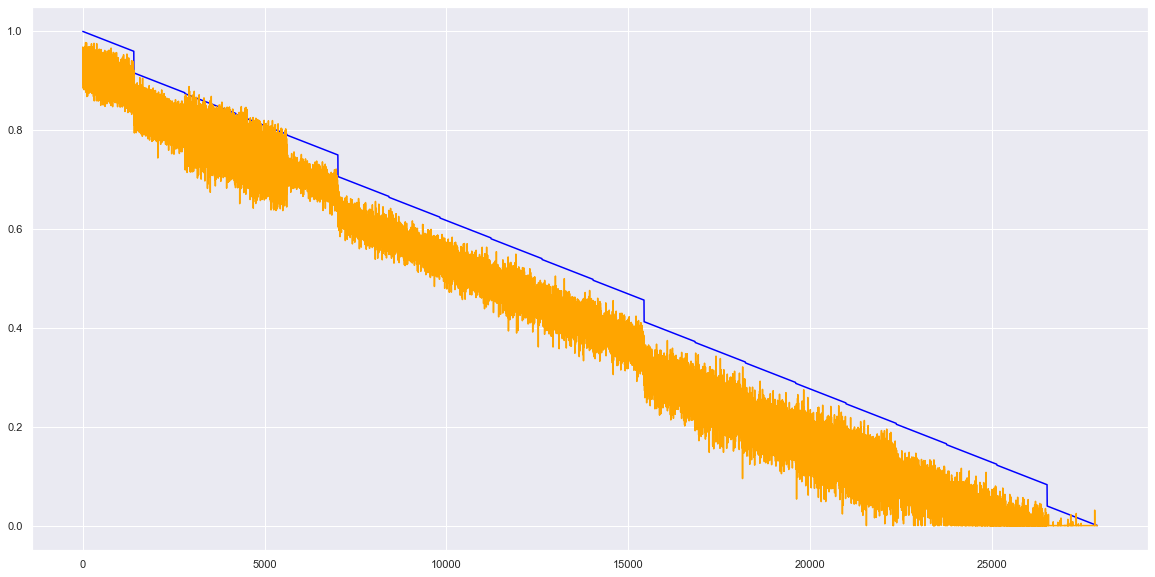

In [ ]:
# Here we plot our predicted values against the true ones

fig , ax = plt.subplots(nrows = 1, figsize=(20,10))
ax.plot(X, real, color = 'blue')
ax.plot(X, prediction, color = 'orange')

###### The same for the test data 

In [ ]:
lstm_model.evaluate(test_inputs, test_out)

2022-04-30 02:35:02.822159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 02:35:02.903227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 02:35:03.014989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


175/175 [==============================] - 4s 19ms/step - loss: 0.0032 - mse: 0.0065 - mae: 0.0762


[0.003231059992685914, 0.006462119985371828, 0.07622145861387253]

In [ ]:
t_real= np.concatenate(test_out)
t_prediction = np.concatenate(lstm_model.predict(test_inputs))
print('The mean absolute error is : ', mean_absolute_error(t_real, t_prediction))
print('The mean squared error is : ', mean_squared_error(t_real, t_prediction))
print('The r**2 score is : ', r2_score(t_real, t_prediction))
t_X = np.arange(1,len(t_real)+1)

The mean absolute error is :  0.07622143823125581
The mean squared error is :  0.006462121516032021
The r**2 score is :  0.9400900412459938


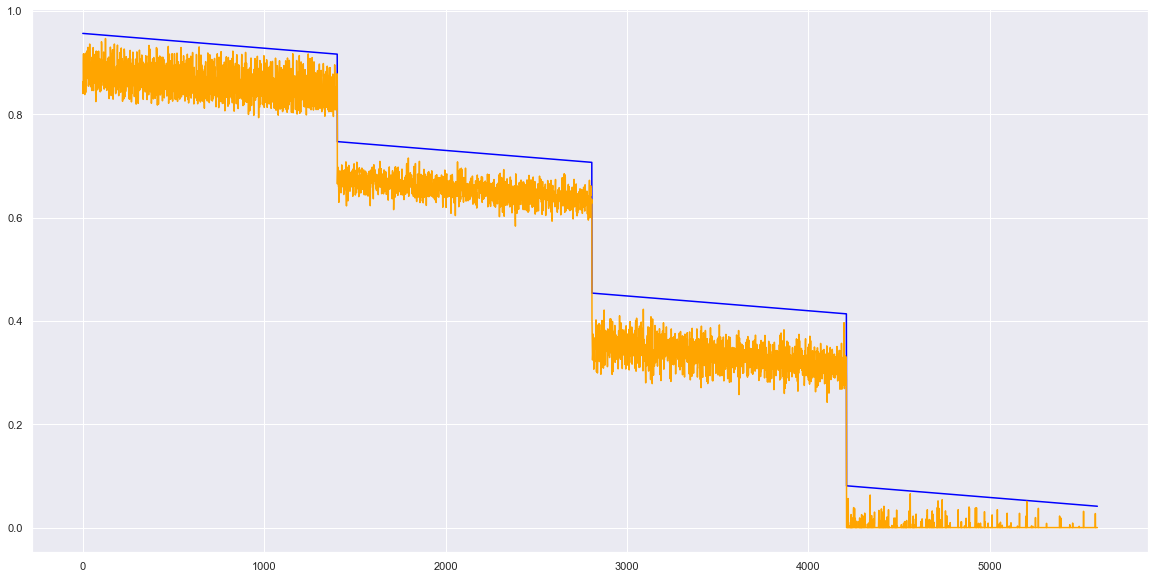

In [ ]:
# Here we plot our predicted values against the true ones

fig , ax = plt.subplots(nrows = 1, figsize=(20,10))
ax.plot(t_X, t_real, color = 'blue')
ax.plot(t_X, t_prediction, color = 'orange')

## CBLSTM

In [ ]:
tf.keras.backend.clear_session()

nb_features = train_inputs.shape[2]
sequence_length  = train_inputs.shape[1]
nb_out = train_out.shape[1]

cblstm = tf.keras.models.Sequential()

cblstm.add(tf.keras.layers.Conv1D(filters = 5, kernel_size = 5 ))
cblstm.add(tf.keras.layers.MaxPooling1D(pool_size = 5 ))

cblstm.add(tf.keras.layers.LSTM(64, return_sequences = True))
cblstm.add(tf.keras.layers.Dropout(0.3))
    
cblstm.add(tf.keras.layers.LSTM(64, return_sequences = False, go_backwards = True))
cblstm.add(tf.keras.layers.Dropout(0.3))

cblstm.add(tf.keras.layers.Dense(nb_out, activation = 'relu'))

cblstm.compile(loss=tf.keras.losses.Huber(), optimizer = tf.keras.optimizers.Adam(learning_rate=10**-3), metrics =['mse','mae'])

history = cblstm.fit(x=train_inputs, y=train_out,  batch_size = 64, epochs = 10)

Epoch 1/10


2022-04-30 02:35:26.960257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 02:35:27.193153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 02:35:27.256946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 02:35:27.340070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  3/436 [..............................] - ETA: 13s - loss: 0.1083 - mse: 0.2166 - mae: 0.3872  

2022-04-30 02:35:27.447447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


436/436 [==============================] - 12s 23ms/step - loss: 0.0253 - mse: 0.0506 - mae: 0.1842
Epoch 2/10
436/436 [==============================] - 10s 23ms/step - loss: 0.0105 - mse: 0.0211 - mae: 0.1013
Epoch 3/10
436/436 [==============================] - 10s 23ms/step - loss: 0.0178 - mse: 0.0356 - mae: 0.1439
Epoch 4/10
436/436 [==============================] - 10s 22ms/step - loss: 0.0368 - mse: 0.0736 - mae: 0.2300
Epoch 5/10
436/436 [==============================] - 10s 22ms/step - loss: 0.0387 - mse: 0.0773 - mae: 0.2389
Epoch 6/10
436/436 [==============================] - 10s 23ms/step - loss: 0.0379 - mse: 0.0758 - mae: 0.2364
Epoch 7/10
436/436 [==============================] - 10s 22ms/step - loss: 0.0377 - mse: 0.0754 - mae: 0.2339
Epoch 8/10
436/436 [==============================] - 10s 22ms/step - loss: 0.0274 - mse: 0.0548 - mae: 0.1913
Epoch 9/10
436/436 [==============================] - 10s 22ms/step - loss: 0.0102 - mse: 0.0205 - mae: 0.1093
Epoch 10/10


In [ ]:
cblstm.evaluate(train_inputs, train_out)

2022-04-30 02:37:23.651996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 02:37:23.737736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 10/872 [..............................] - ETA: 10s - loss: 1.5655e-04 - mse: 3.1310e-04 - mae: 0.0139

2022-04-30 02:37:23.903391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


872/872 [==============================] - 9s 9ms/step - loss: 0.0015 - mse: 0.0030 - mae: 0.0467


[0.0014864567201584578, 0.0029729134403169155, 0.046685125678777695]

In [ ]:
real= np.concatenate(train_out)
prediction = np.concatenate(cblstm.predict(train_inputs))
print('The mean absolute error is : ', mean_absolute_error(real, prediction))
print('The mean squared error is : ', mean_squared_error(real, prediction))
print('The r**2 score is : ', r2_score(real, prediction))
X = np.arange(1,len(real)+1)

2022-04-30 02:37:32.359785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 02:37:32.431551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 02:37:32.480179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


The mean absolute error is :  0.04668510792477911
The mean squared error is :  0.002972913748159333
The r**2 score is :  0.9618741883045223


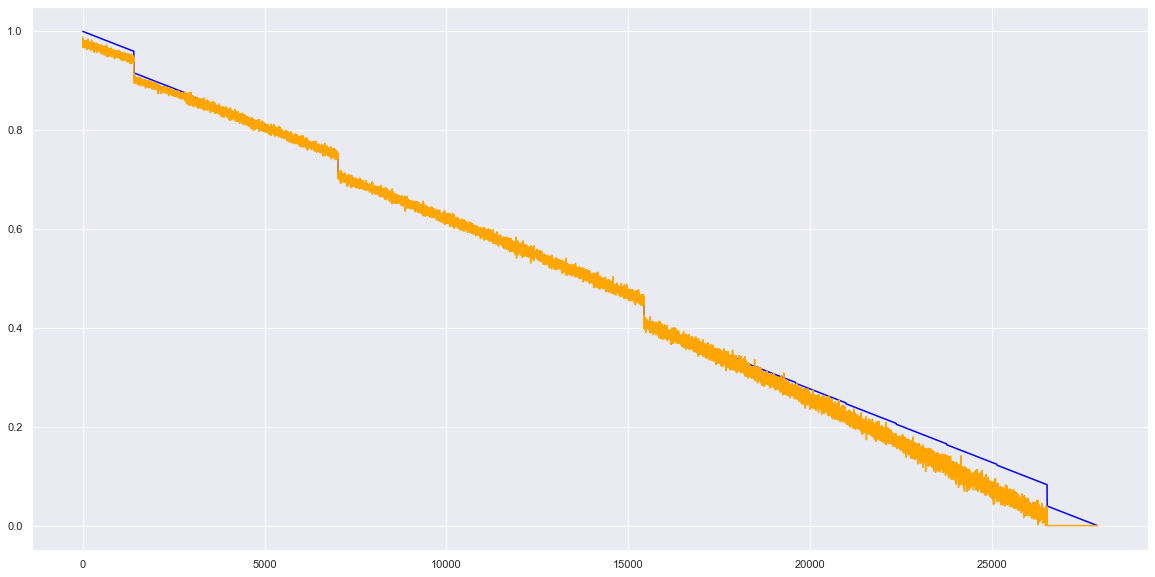

In [ ]:
# Here we plot our predicted values against the true ones

fig , ax = plt.subplots(nrows = 1, figsize=(20,10))
ax.plot(X, real, color = 'blue')
ax.plot(X, prediction, color = 'orange')

###### The same for the test data 

In [ ]:
cblstm.evaluate(test_inputs, test_out)

175/175 [==============================] - 2s 9ms/step - loss: 8.4742e-04 - mse: 0.0017 - mae: 0.0350


[0.0008474206551909447, 0.0016948413103818893, 0.035015761852264404]

In [ ]:
t_real= np.concatenate(test_out)
t_prediction = np.concatenate(cblstm.predict(test_inputs))
print('The mean absolute error is : ', mean_absolute_error(t_real, t_prediction))
print('The mean squared error is : ', mean_squared_error(t_real, t_prediction))
print('The r**2 score is : ', r2_score(t_real, t_prediction))
t_X = np.arange(1,len(t_real)+1)

The mean absolute error is :  0.035015765577946986
The mean squared error is :  0.0016948412169473582
The r**2 score is :  0.9842872240718472


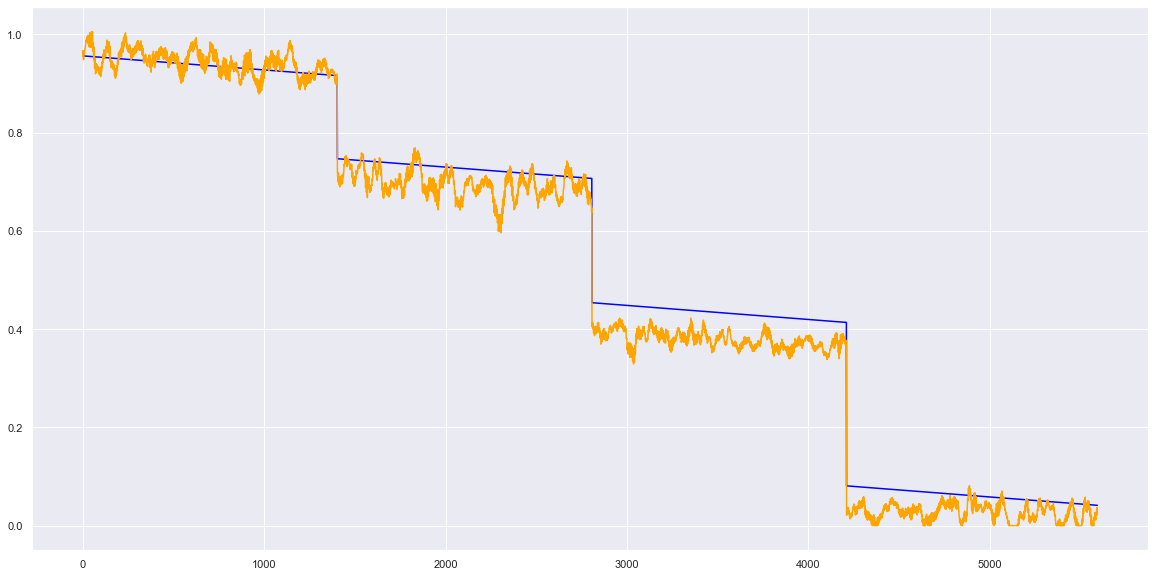

In [ ]:
# Here we plot our predicted values against the true ones

fig , ax = plt.subplots(nrows = 1, figsize=(20,10))
ax.plot(t_X, t_real, color = 'blue')
ax.plot(t_X, t_prediction, color = 'orange')

# Classification problem

We will work with the same data of the RUL. Here we should define our target. What i am going to do is my intuition. So i have two things can be done :

    1) We keep the failure period and we add a 24 hours (an example of the period needed for preparing the intervention), so the model can predict the failure and 24hours before. But here the goodness of the model will depend on the data. And it can tend to predict the failure very well but less good for the 24hours.
    
    2) We label just the 24 hours before the failure as 1. Here the model will give more focus on the 24 hours before. And it will be more strong to predict it. And also it can predict the failure too but not 100%. The problem here is it depends on the data before the failure, if it is continued and provide tendancy to the failure.

So for now, i will use the first method, and see what it will give us. Because, the focus on the failure on the 24hours depends on what you want. So, you decide. Also, here we don't have alot of data so it will give a goos results

In [ ]:
import pandas as pd
data = pd.read_csv("/Users/mouhcinelaaroussi/Desktop/Motor_4.csv")
data.reset_index(drop = True, inplace = True)
#data.groupby('category').count()

In [ ]:
df11 = data[data["category"] < 27]
df22 = data[data['category'] >= 27]

df11['label1'] = np.zeros(df11.shape[0])
df22['label1'] = np.ones(df22.shape[0])

data = pd.concat([df11,df22])

/var/folders/jr/6bl3ws9s2g7d8nwbs6rgtpb40000gn/T/ipykernel_25796/3308559898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['label1'] = np.zeros(df11.shape[0])
/var/folders/jr/6bl3ws9s2g7d8nwbs6rgtpb40000gn/T/ipykernel_25796/3308559898.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22['label1'] = np.ones(df22.shape[0])


In [ ]:
# We concatenate the 4 subsets
# Apply the function for ech dataframe of the same frequency using the appropriate ratio to obtain 1440 values
#This is a function, that i wrote my self, which take a well separated range of data for a data frame
# The values here, are taken manually from each day  : We split over the days that have 

df1 = data[data.index < 307200].reset_index(drop = True)

df2 = data[(307200 <= data.index) & (data.index < 1126400)].reset_index(drop = True)

df3 = data[data["category"]==22].reset_index(drop = True)

df4 = data[1535999 < data.index].reset_index(drop = True)
def take_min(df,b):
    a = []
    c = [0]
    c = c + list(df['category'].unique())
    for i in range(1 ,len(c)):
        a = a + list(np.arange(len(df[df['category']==c[i-1]].index)*(i-1), len(df[df['category']==c[i]].index)*i, b))
    return df.loc[a]

df1 = take_min(df1, 14)
df2 = take_min(df2, 142)
df3 = take_min(df3, 284)
df4 = df4[df4.index.isin(np.arange(0, 2252799, 142))]
data = pd.concat([df1,df2,df3,df4])
data.sort_values("category", inplace = True)
data.reset_index(drop = True, inplace = True)

#### Now, we can begin the classification

##### SPLIT of the data

In [ ]:
test_data = data[(data["category"]==6) |(data["category"]==17) | (data["category"]==10) | (data["category"]==33) | (data["category"]==30)]
train_data= data.loc[list(set(list(data.index))-set(test_data.index))]

In [ ]:
test_data.drop(["RUL","cycle"], axis =1, inplace = True)
train_data.drop(["RUL","cycle"], axis =1, inplace = True)

/var/folders/jr/6bl3ws9s2g7d8nwbs6rgtpb40000gn/T/ipykernel_25796/4182282145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(["RUL","cycle"], axis =1, inplace = True)


In [ ]:
train_inputs = train_data[["s1","s2","s3","s4","s5","s6"]]
test_inputs = test_data[["s1","s2","s3","s4","s5","s6"]]
train_output = train_data['label1']
test_output = test_data['label1']

### Random Forest

In [ ]:
rfr = RandomForestClassifier()

rfr.fit(train_inputs, train_output)

RandomForestClassifier()

##### This plot is an importance plot which shows the importance of each feature in the prediction effort

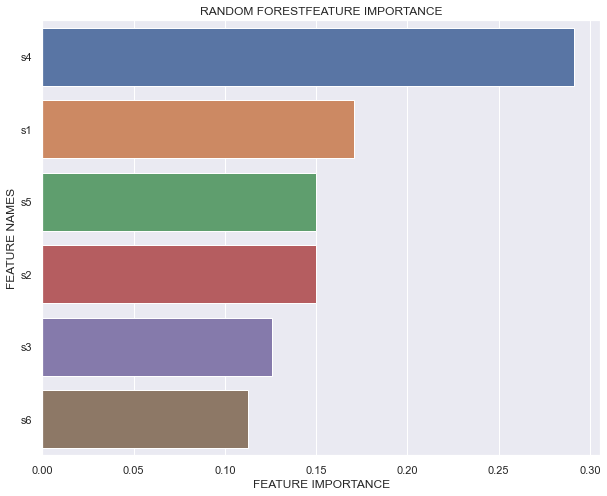

In [ ]:
def plot_feature_importance(importance,names,model_type) :
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
plot_feature_importance(rfr.feature_importances_,train_inputs.columns,'RANDOM FOREST')

In [ ]:
rfr_pred = rfr.predict(train_inputs)

print(confusion_matrix(train_output, rfr_pred))
print(classification_report(train_output, rfr_pred))

[[1904639       1]
 [     11 1228789]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1904640
         1.0       1.00      1.00      1.00   1228800

    accuracy                           1.00   3133440
   macro avg       1.00      1.00      1.00   3133440
weighted avg       1.00      1.00      1.00   3133440



In [ ]:
t_rfr_pred = rfr.predict(test_inputs)

print(confusion_matrix(test_output, t_rfr_pred))
print(classification_report(test_output, t_rfr_pred))

[[215230  30530]
 [100987 308613]]
              precision    recall  f1-score   support

         0.0       0.68      0.88      0.77    245760
         1.0       0.91      0.75      0.82    409600

    accuracy                           0.80    655360
   macro avg       0.80      0.81      0.80    655360
weighted avg       0.82      0.80      0.80    655360



## ExtraTrees

In [ ]:
import sklearn
model = sklearn.ensemble.ExtraTreesClassifier()
model.fit(train_inputs, train_output)

etr_pred = model.predict(train_inputs)
print(confusion_matrix(train_output, etr_pred))
print(classification_report(train_output, etr_pred))

[[1904640       0]
 [      0 1228800]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1904640
         1.0       1.00      1.00      1.00   1228800

    accuracy                           1.00   3133440
   macro avg       1.00      1.00      1.00   3133440
weighted avg       1.00      1.00      1.00   3133440



In [ ]:
t_etr_pred = model.predict(test_inputs)

print(confusion_matrix(test_output, t_etr_pred))
print(classification_report(test_output, t_etr_pred))

[[218696  27064]
 [107573 302027]]
              precision    recall  f1-score   support

         0.0       0.67      0.89      0.76    245760
         1.0       0.92      0.74      0.82    409600

    accuracy                           0.79    655360
   macro avg       0.79      0.81      0.79    655360
weighted avg       0.82      0.79      0.80    655360



## Gradient Boosting

In [ ]:
import sklearn
model = sklearn.ensemble.GradientBoostingClassifier()
model.fit(train_inputs, train_output)

etr_pred = model.predict(train_inputs)
print(confusion_matrix(train_output, etr_pred))
print(classification_report(train_output, etr_pred))

[[1739000  165640]
 [ 566141  662659]]
              precision    recall  f1-score   support

         0.0       0.75      0.91      0.83   1904640
         1.0       0.80      0.54      0.64   1228800

    accuracy                           0.77   3133440
   macro avg       0.78      0.73      0.74   3133440
weighted avg       0.77      0.77      0.75   3133440



In [ ]:
t_etr_pred = model.predict(test_inputs)

print(confusion_matrix(test_output, t_etr_pred))
print(classification_report(test_output, t_etr_pred))

[[222448  23312]
 [120786 288814]]
              precision    recall  f1-score   support

         0.0       0.65      0.91      0.76    245760
         1.0       0.93      0.71      0.80    409600

    accuracy                           0.78    655360
   macro avg       0.79      0.81      0.78    655360
weighted avg       0.82      0.78      0.78    655360



## Adaboost

In [ ]:
import sklearn
model = sklearn.ensemble.AdaBoostClassifier()
model.fit(train_inputs, train_output)

etr_pred = model.predict(train_inputs)
print(confusion_matrix(train_output, etr_pred))
print(classification_report(train_output, etr_pred))

[[1695995  208645]
 [ 606253  622547]]
              precision    recall  f1-score   support

         0.0       0.74      0.89      0.81   1904640
         1.0       0.75      0.51      0.60   1228800

    accuracy                           0.74   3133440
   macro avg       0.74      0.70      0.71   3133440
weighted avg       0.74      0.74      0.73   3133440



In [ ]:
t_etr_pred = model.predict(test_inputs)

print(confusion_matrix(test_output, t_etr_pred))
print(classification_report(test_output, t_etr_pred))

[[220745  25015]
 [129504 280096]]
              precision    recall  f1-score   support

         0.0       0.63      0.90      0.74    245760
         1.0       0.92      0.68      0.78    409600

    accuracy                           0.76    655360
   macro avg       0.77      0.79      0.76    655360
weighted avg       0.81      0.76      0.77    655360



### Normalize data

In [ ]:
scaler = preprocessing.MinMaxScaler()

cols_scal = train_data.columns.difference(['category'])

train_set_norm_int = pd.DataFrame(scaler.fit_transform(train_data[cols_scal]),
                                  columns = cols_scal,
                                  index = train_data.index)

train_data = train_data[train_data.columns.difference(cols_scal)].join(train_set_norm_int)

train_data.describe()

cols_scal = test_data.columns.difference(['category'])

test_set_norm_int = pd.DataFrame(scaler.transform(test_data[cols_scal]),
                                  columns = cols_scal,
                                  index = test_data.index)

test_data = test_data[test_data.columns.difference(cols_scal)].join(test_set_norm_int)
test_data.describe()

,category,label1,s1,s2,s3,s4,s5,s6
count,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000
mean,19.134841,0.397629,0.508590,0.464038,0.509782,0.496482,0.524823,0.494631
std,10.688541,0.489442,0.169164,0.136057,0.101756,0.150318,0.086792,0.070659
min,6.000000,0.000000,-0.094468,-0.036735,0.013863,0.023697,0.159752,0.050785
25%,10.000000,0.000000,0.426860,0.377612,0.448459,0.422222,0.470739,0.453973
50%,17.000000,0.000000,0.510529,0.461871,0.509829,0.495503,0.524321,0.495437
75%,30.000000,1.000000,0.591326,0.549444,0.572010,0.568846,0.578715,0.535224
max,33.000000,1.000000,1.096505,0.983431,1.030491,1.017278,0.936870,1.006396


In [ ]:
train_data.describe()

,category,label1,s1,s2,s3,s4,s5,s6
count,36335.000000,36335.000000,36335.000000,36335.000000,36335.000000,36335.000000,36335.000000,36335.000000
mean,16.822513,0.198569,0.482308,0.489895,0.519360,0.496895,0.482889,0.451365
std,9.608369,0.398928,0.097303,0.099795,0.101697,0.104243,0.088079,0.063877
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.427077,0.424312,0.457871,0.446448,0.427026,0.417428
50%,16.000000,0.000000,0.482813,0.488138,0.519954,0.496560,0.482772,0.451162
75%,25.000000,0.000000,0.537150,0.554859,0.581601,0.546654,0.539128,0.485372
max,34.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Sequence generation

In [ ]:
def gen_seq(data, seq_length, columns):
    L=[]
    n = data.shape[0]
    for i in range(0, n - seq_length):
        L.append(data[i:i+seq_length][columns].values)
    return(L)

train_inputs = np.concatenate(np.array([gen_seq(train_data[train_data['category'] == id], 60, ["s1","s2","s3","s4","s5","s6"])
                               for id in train_data['category'].unique()]))

test_inputs = np.concatenate(np.array([gen_seq(test_data[test_data['category'] == id], 60, ["s1","s2","s3","s4","s5","s6"])
                               for id in test_data['category'].unique()]))

def gen_labels(id_df, seq_length, label):
    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length:num_elements]

train_out = np.concatenate(np.array([gen_labels(train_data[train_data['category'] == id], 60, ["label1"])
                               for id in train_data['category'].unique()]))

test_out = np.concatenate(np.array([gen_labels(test_data[test_data['category'] == id], 60, ["label1"])
                               for id in test_data['category'].unique()]))

/var/folders/jr/6bl3ws9s2g7d8nwbs6rgtpb40000gn/T/ipykernel_25796/1926598214.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_inputs = np.concatenate(np.array([gen_seq(train_data[train_data['category'] == id], 60, ["s1","s2","s3","s4","s5","s6"])
/var/folders/jr/6bl3ws9s2g7d8nwbs6rgtpb40000gn/T/ipykernel_25796/1926598214.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_inputs = np.concatenate(np.array([gen_seq(test_data[test_data['category'] == id], 60, ["s1","s2","s3","s4","s5","s6"])
/var/folders/jr/6bl3ws9s2g7d8nwbs6rgtpb40000gn/T

In [ ]:
train_inputs.shape

(36272, 60, 6)

In [ ]:
train_out.shape

(36272, 1)

In [ ]:
test_inputs.shape

(6953, 60, 6)

In [ ]:
test_out.shape

(6953, 1)

### Unbalanced data
This is a problem very commun in the classification. Unbalanced data means that our two classes are not balanced in terms of number of rows. For example in our case, we have the number of normal rows (label =0) more than the failure rows (label =1). And this forced the model to give more attention to the 0 class than 1.
There is two commun solution for this :
    
    1) To perform an oversampling for the minority class, we will add automtically rows with the same characteristics of those having real labes =1 and give them a label = 1; or we do the inverse for the majority class an undersampling.
    
    2) second thing, is to add weights in the loss function which penalize the desequilibre.

Now in our case, the order is very important for us because the LSTM takes a sequence of data. And for the first method it shuffles the data. So the perfect method for us is to define a weights for the loss function of the LSTM model

In [ ]:
#define the class_weights
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes = np.array(train_data['label1'].unique()), y=np.array(train_data['label1']))
class_weights = {0: class_weights[0], 1: class_weights[1]}

##### LSTM For classification
For the model here, the changes that we should do for a classification task :
    
    1) Change the activation function in line "1" for a binary classification it's sigmoid, and for a regression we can use 'relu' 'tanh'...
    2) The metrics while compiling the mode (line "2"). For the classification we use accuracy and Recall, for the regression we use 'mae' (Mean Absolute Error) and 'mse' (Measn suared Error).

I also add two line as a comment, this is how to add another layer of neurons for the complexity of the model, in case you have more complex and more amount of data.

In [ ]:
#Model
tf.keras.backend.clear_session()

nb_features = train_inputs.shape[2]
sequence_length  = train_inputs.shape[1]
nb_out = train_out.shape[1]

lstm_model = tf.keras.models.Sequential([
#    tf.keras.layers.LSTM(128, input_shape = (sequence_length, nb_features), return_sequences = True),
#    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64, input_shape = (sequence_length, nb_features), return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32, input_shape = (sequence_length, nb_features)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(nb_out, activation = 'softmax')
])


lstm_model.compile(loss= 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(lr = 10**-3), metrics =['accuracy', tf.keras.metrics.Recall()])

history = lstm_model.fit(train_inputs, train_out, epochs = 20, class_weight = class_weights, batch_size=64)

Epoch 1/20


2022-04-30 06:20:08.705848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 06:20:08.953199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 06:20:09.050146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 06:20:09.192176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 06:20:09.371963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


567/567 [==============================] - 26s 43ms/step - loss: 0.6961 - accuracy: 0.2303 - recall: 1.0000
Epoch 2/20
567/567 [==============================] - 23s 40ms/step - loss: 0.6950 - accuracy: 0.2303 - recall: 1.0000
Epoch 3/20
567/567 [==============================] - 23s 40ms/step - loss: 0.6953 - accuracy: 0.2303 - recall: 1.0000
Epoch 4/20
567/567 [==============================] - 23s 40ms/step - loss: 0.6950 - accuracy: 0.2303 - recall: 1.0000
Epoch 5/20
567/567 [==============================] - 23s 40ms/step - loss: 0.6949 - accuracy: 0.2303 - recall: 1.0000
Epoch 6/20
567/567 [==============================] - 23s 40ms/step - loss: 0.6947 - accuracy: 0.2303 - recall: 1.0000
Epoch 7/20
567/567 [==============================] - 23s 40ms/step - loss: 0.6947 - accuracy: 0.2303 - recall: 1.0000
Epoch 8/20
567/567 [==============================] - 23s 40ms/step - loss: 0.6946 - accuracy: 0.2303 - recall: 1.0000
Epoch 9/20
567/567 [==============================] - 23s 4

###### Train Evaluation (Just like before)

Here we will use accuracy and Recall as a metrics. They are a percentage of true labelled datapoints. And our goal is to maximize them BOTH:

    One = (True predicted ones) / (Trues ones + Trues zeros)  

    and the other = (True predicted zeros) / (Trues ones + Trues zeros)

In [ ]:
lstm.evaluate(train_inputs, train_out)

34835/34835 [==============================] - 16s 451us/sample - loss: 1.1601e-05 - accuracy: 1.0000 - recall: 1.0000


[1.1600833983444182e-05, 1.0, 1.0]

In [ ]:
tl = np.concatenate(train_out)
pl = np.concatenate(lstm.predict(train_inputs))
print(confusion_matrix(tl, pl))
print(classification_report(tl, pl))

[[27920     0]
 [    0  6915]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27920
         1.0       1.00      1.00      1.00      6915

    accuracy                           1.00     34835
   macro avg       1.00      1.00      1.00     34835
weighted avg       1.00      1.00      1.00     34835



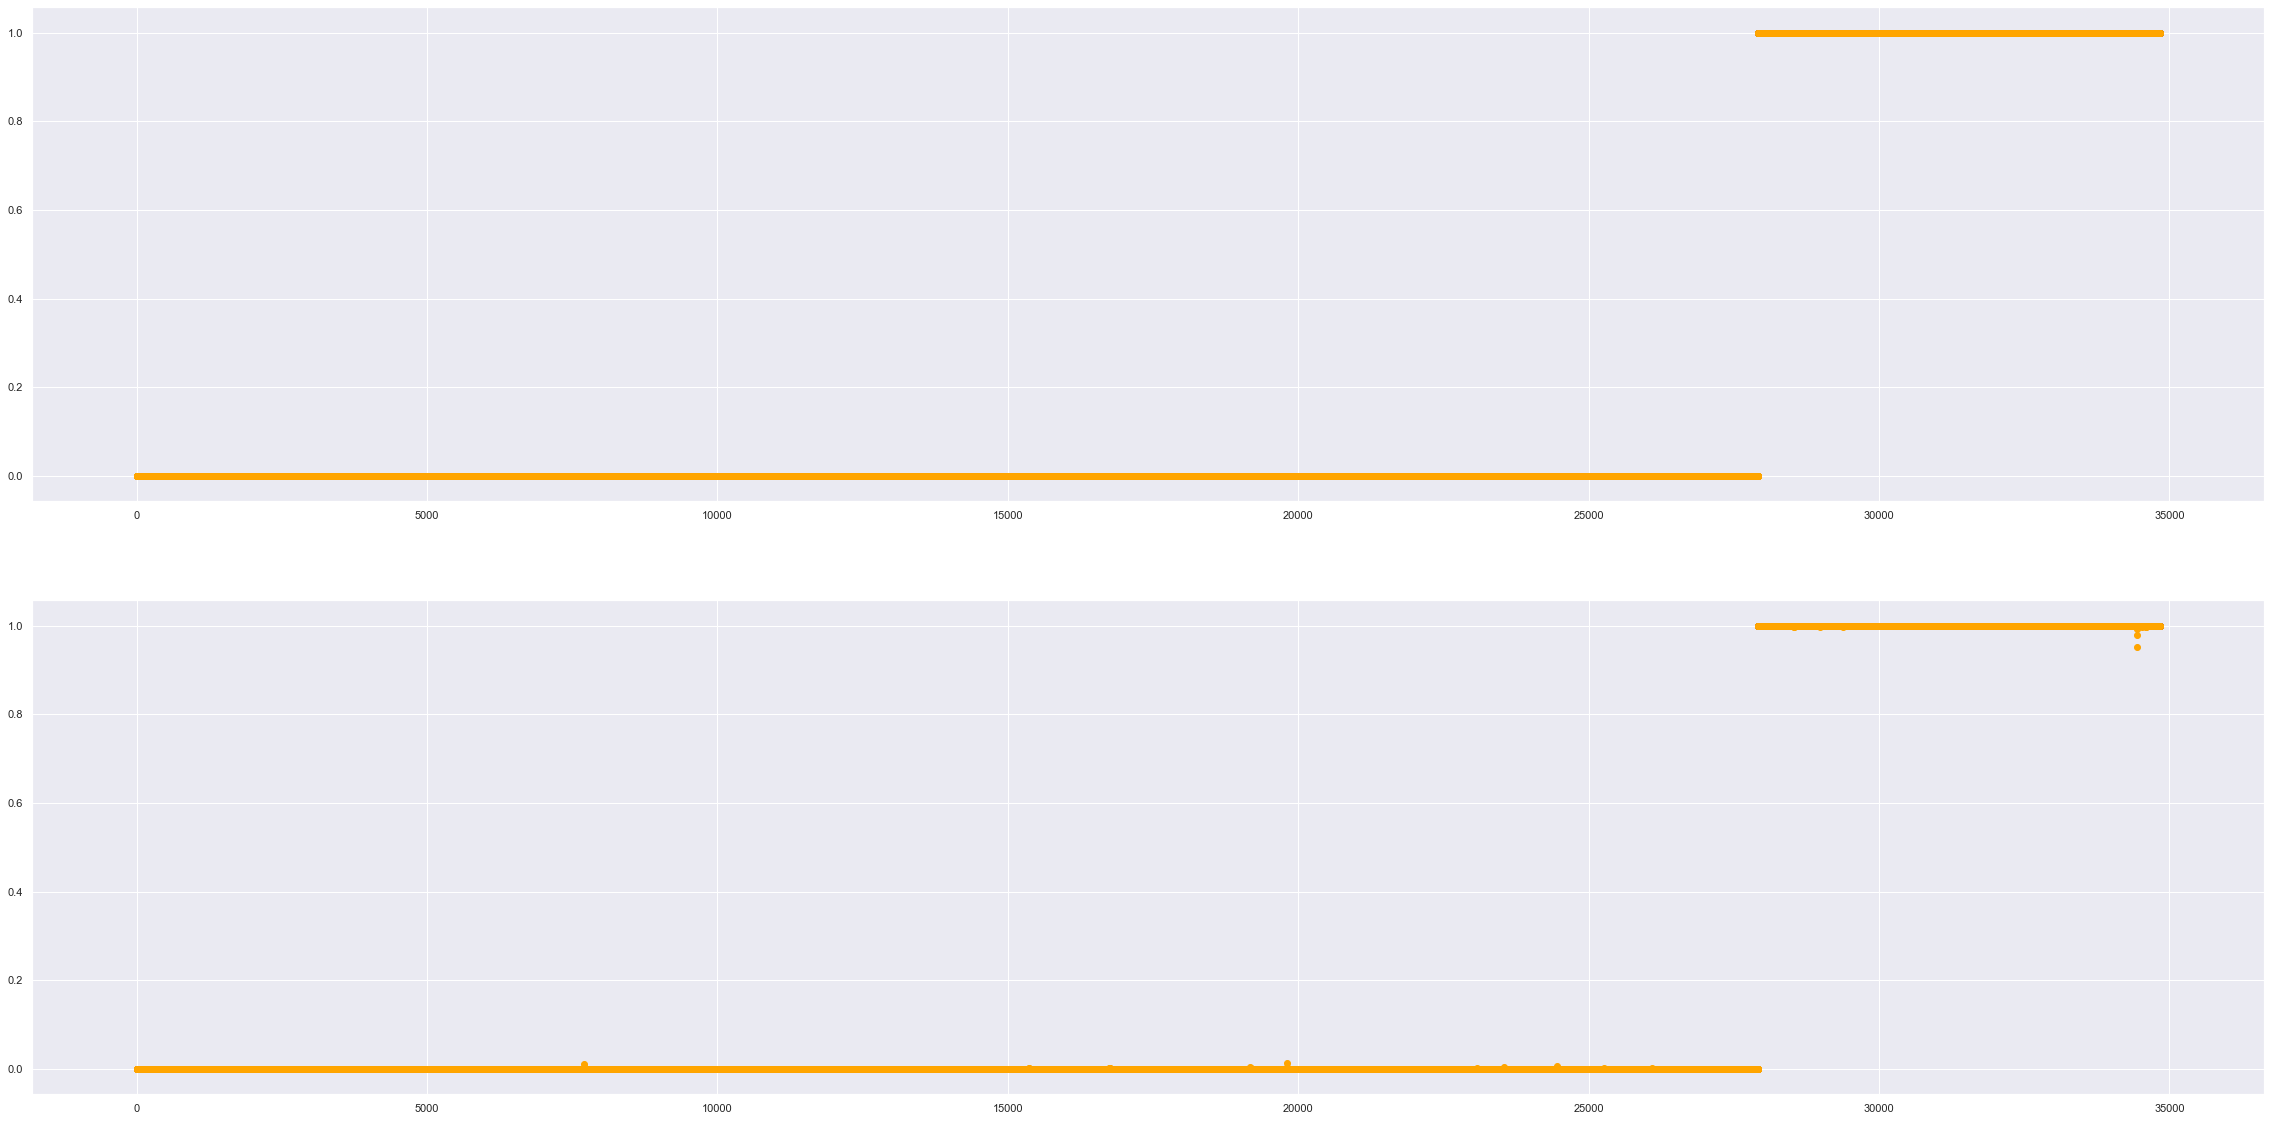

In [ ]:
# This is a plot representing the true labels Vs the predicted ones (You see just one color because all 
# the values are correctly predicted)

fig , ax = plt.subplots(nrows = 2, figsize=(40,20))
ax[0].scatter(X, tl, color = 'blue')
ax[0].scatter(X, pl, color = 'orange')

# This is a plot representing the true labels Vs the probabilities of the classes to be 1 or a 0 (You see just one 
#color because all the values are correctly predicted)
ax[1].scatter(X, tl, color = 'blue')
ax[1].scatter(X, plp, color = 'orange')

###### Test Evaluation (Just like train evaluation)

In [ ]:
lstm.evaluate(test_inputs, test_out)

6955/6955 [==============================] - 3s 426us/sample - loss: 0.8251 - accuracy: 0.8636 - recall: 0.6609


[0.8250992291142878, 0.8635514, 0.6608821]

In [ ]:
t_tl = np.concatenate(test_out)
t_pl = np.concatenate(lstm.predict(test_inputs))
print(confusion_matrix(t_tl, t_pl))
print(classification_report(t_tl, t_pl))

[[4178   11]
 [ 938 1828]]
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90      4189
         1.0       0.99      0.66      0.79      2766

    accuracy                           0.86      6955
   macro avg       0.91      0.83      0.85      6955
weighted avg       0.89      0.86      0.86      6955



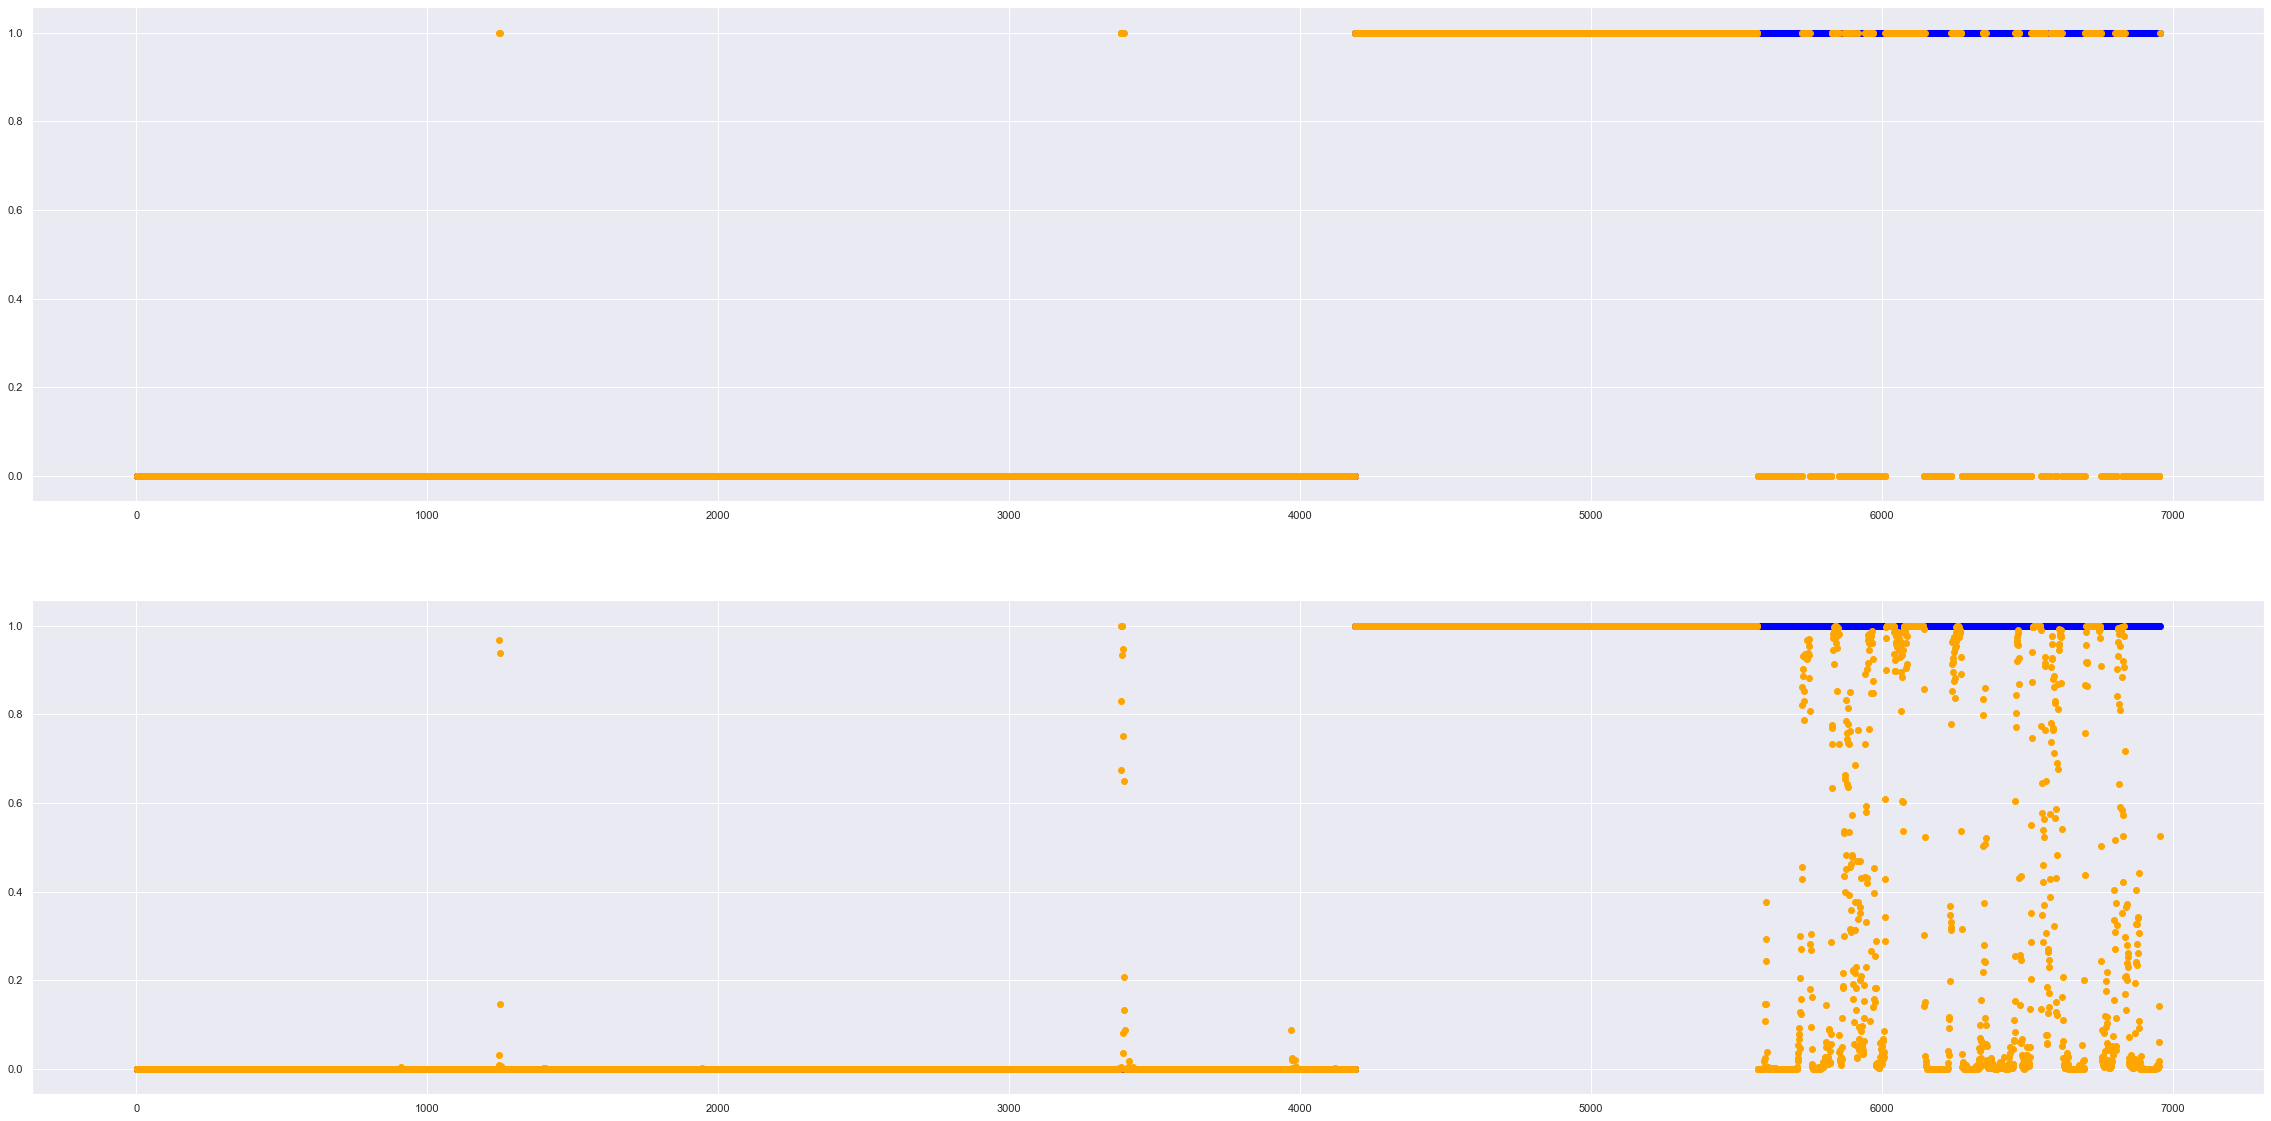

In [ ]:
fig , ax = plt.subplots(nrows = 2, figsize=(40,20))
ax[0].scatter(X, t_tl, color = 'blue')
ax[0].scatter(X, t_pl, color = 'orange')

ax[1].scatter(X, t_tl, color = 'blue')
ax[1].scatter(X, t_plp, color = 'orange')

## CBLSTM

In [ ]:
tf.keras.backend.clear_session()

nb_features = train_inputs.shape[2]
sequence_length  = train_inputs.shape[1]
nb_out = train_out.shape[1]

cblstm = tf.keras.models.Sequential()

cblstm.add(tf.keras.layers.Conv1D(filters = 5, kernel_size = 5 ))
cblstm.add(tf.keras.layers.MaxPooling1D(pool_size = 5 ))

cblstm.add(tf.keras.layers.LSTM(64, return_sequences = True))
cblstm.add(tf.keras.layers.Dropout(0.3))
    
cblstm.add(tf.keras.layers.LSTM(64, return_sequences = False, go_backwards = True))
cblstm.add(tf.keras.layers.Dropout(0.3))

cblstm.add(tf.keras.layers.Dense(nb_out, activation = 'sigmoid'))

cblstm.compile(loss= 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(lr = 10**-2), metrics =['accuracy', tf.keras.metrics.Recall()])

history = cblstm.fit(train_inputs, train_out, epochs = 20, class_weight = class_weights, batch_size=64)

Epoch 1/10


2022-04-30 02:35:26.960257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 02:35:27.193153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 02:35:27.256946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-30 02:35:27.340070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  3/436 [..............................] - ETA: 13s - loss: 0.1083 - mse: 0.2166 - mae: 0.3872  

2022-04-30 02:35:27.447447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


436/436 [==============================] - 12s 23ms/step - loss: 0.0253 - mse: 0.0506 - mae: 0.1842
Epoch 2/10
436/436 [==============================] - 10s 23ms/step - loss: 0.0105 - mse: 0.0211 - mae: 0.1013
Epoch 3/10
436/436 [==============================] - 10s 23ms/step - loss: 0.0178 - mse: 0.0356 - mae: 0.1439
Epoch 4/10
436/436 [==============================] - 10s 22ms/step - loss: 0.0368 - mse: 0.0736 - mae: 0.2300
Epoch 5/10
436/436 [==============================] - 10s 22ms/step - loss: 0.0387 - mse: 0.0773 - mae: 0.2389
Epoch 6/10
436/436 [==============================] - 10s 23ms/step - loss: 0.0379 - mse: 0.0758 - mae: 0.2364
Epoch 7/10
436/436 [==============================] - 10s 22ms/step - loss: 0.0377 - mse: 0.0754 - mae: 0.2339
Epoch 8/10
436/436 [==============================] - 10s 22ms/step - loss: 0.0274 - mse: 0.0548 - mae: 0.1913
Epoch 9/10
436/436 [==============================] - 10s 22ms/step - loss: 0.0102 - mse: 0.0205 - mae: 0.1093
Epoch 10/10


In [ ]:
cblstm.evaluate(train_inputs, train_out)

34835/34835 [==============================] - 16s 451us/sample - loss: 1.1601e-05 - accuracy: 1.0000 - recall: 1.0000


[1.1600833983444182e-05, 1.0, 1.0]

In [ ]:
tl = np.concatenate(train_out)
pl = np.concatenate(cblstm.predict(train_inputs))
print(confusion_matrix(tl, pl))
print(classification_report(tl, pl))

[[27920     0]
 [    0  6915]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27920
         1.0       1.00      1.00      1.00      6915

    accuracy                           1.00     34835
   macro avg       1.00      1.00      1.00     34835
weighted avg       1.00      1.00      1.00     34835



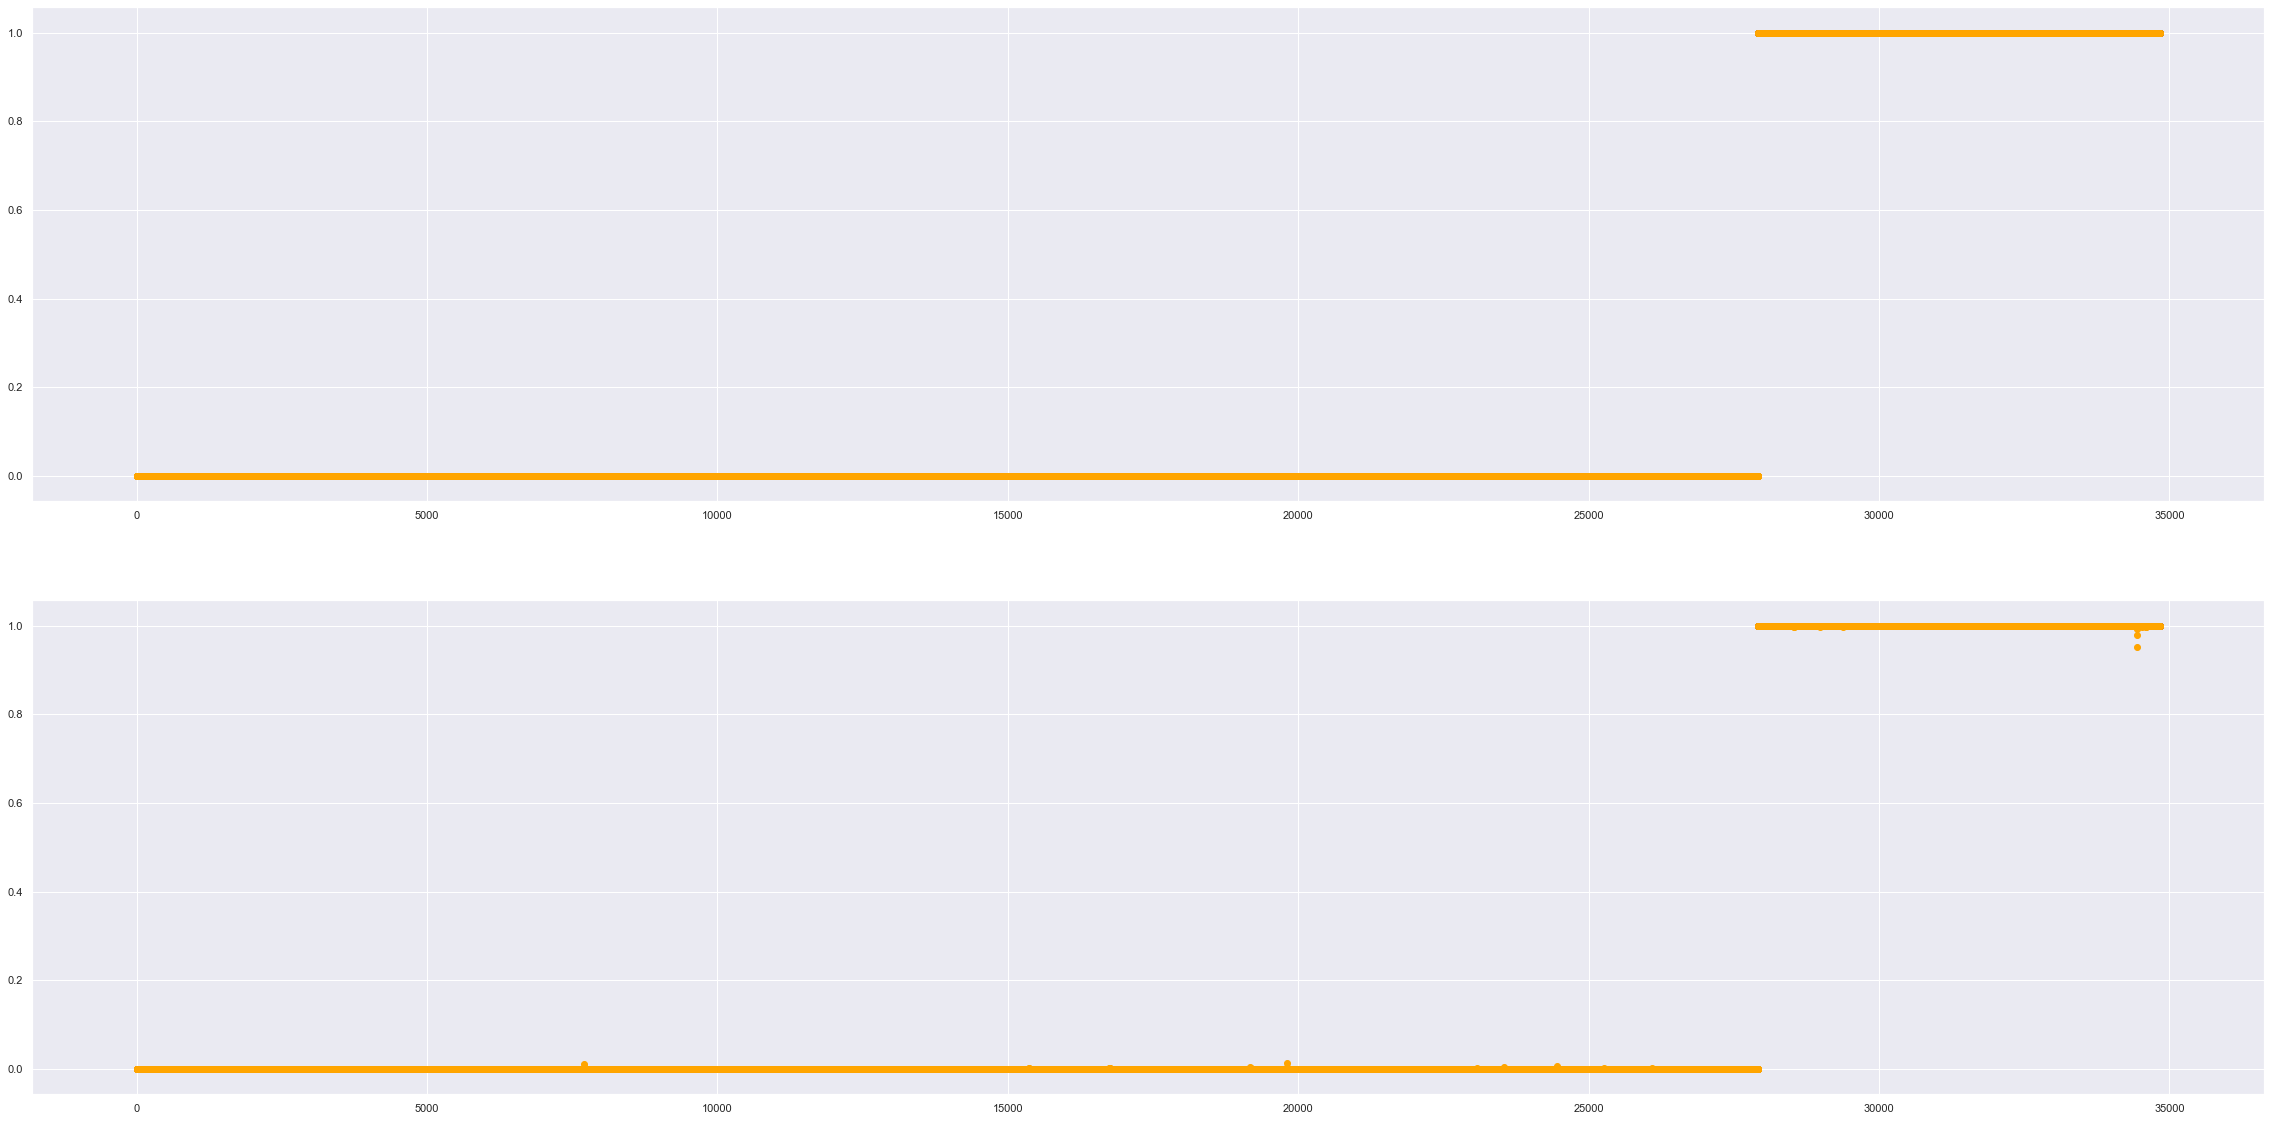

In [ ]:
# This is a plot representing the true labels Vs the predicted ones (You see just one color because all 
# the values are correctly predicted)

fig , ax = plt.subplots(nrows = 2, figsize=(40,20))
ax[0].scatter(X, tl, color = 'blue')
ax[0].scatter(X, pl, color = 'orange')

# This is a plot representing the true labels Vs the probabilities of the classes to be 1 or a 0 (You see just one 
#color because all the values are correctly predicted)
ax[1].scatter(X, tl, color = 'blue')
ax[1].scatter(X, plp, color = 'orange')

###### Test Evaluation (Just like train evaluation)

In [ ]:
cblstm.evaluate(test_inputs, test_out)

6955/6955 [==============================] - 3s 426us/sample - loss: 0.8251 - accuracy: 0.8636 - recall: 0.6609


[0.8250992291142878, 0.8635514, 0.6608821]

In [ ]:
t_tl = np.concatenate(test_out)
t_pl = np.concatenate(cblstm.predict(test_inputs))
print(confusion_matrix(t_tl, t_pl))
print(classification_report(t_tl, t_pl))

[[4178   11]
 [ 938 1828]]
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90      4189
         1.0       0.99      0.66      0.79      2766

    accuracy                           0.86      6955
   macro avg       0.91      0.83      0.85      6955
weighted avg       0.89      0.86      0.86      6955



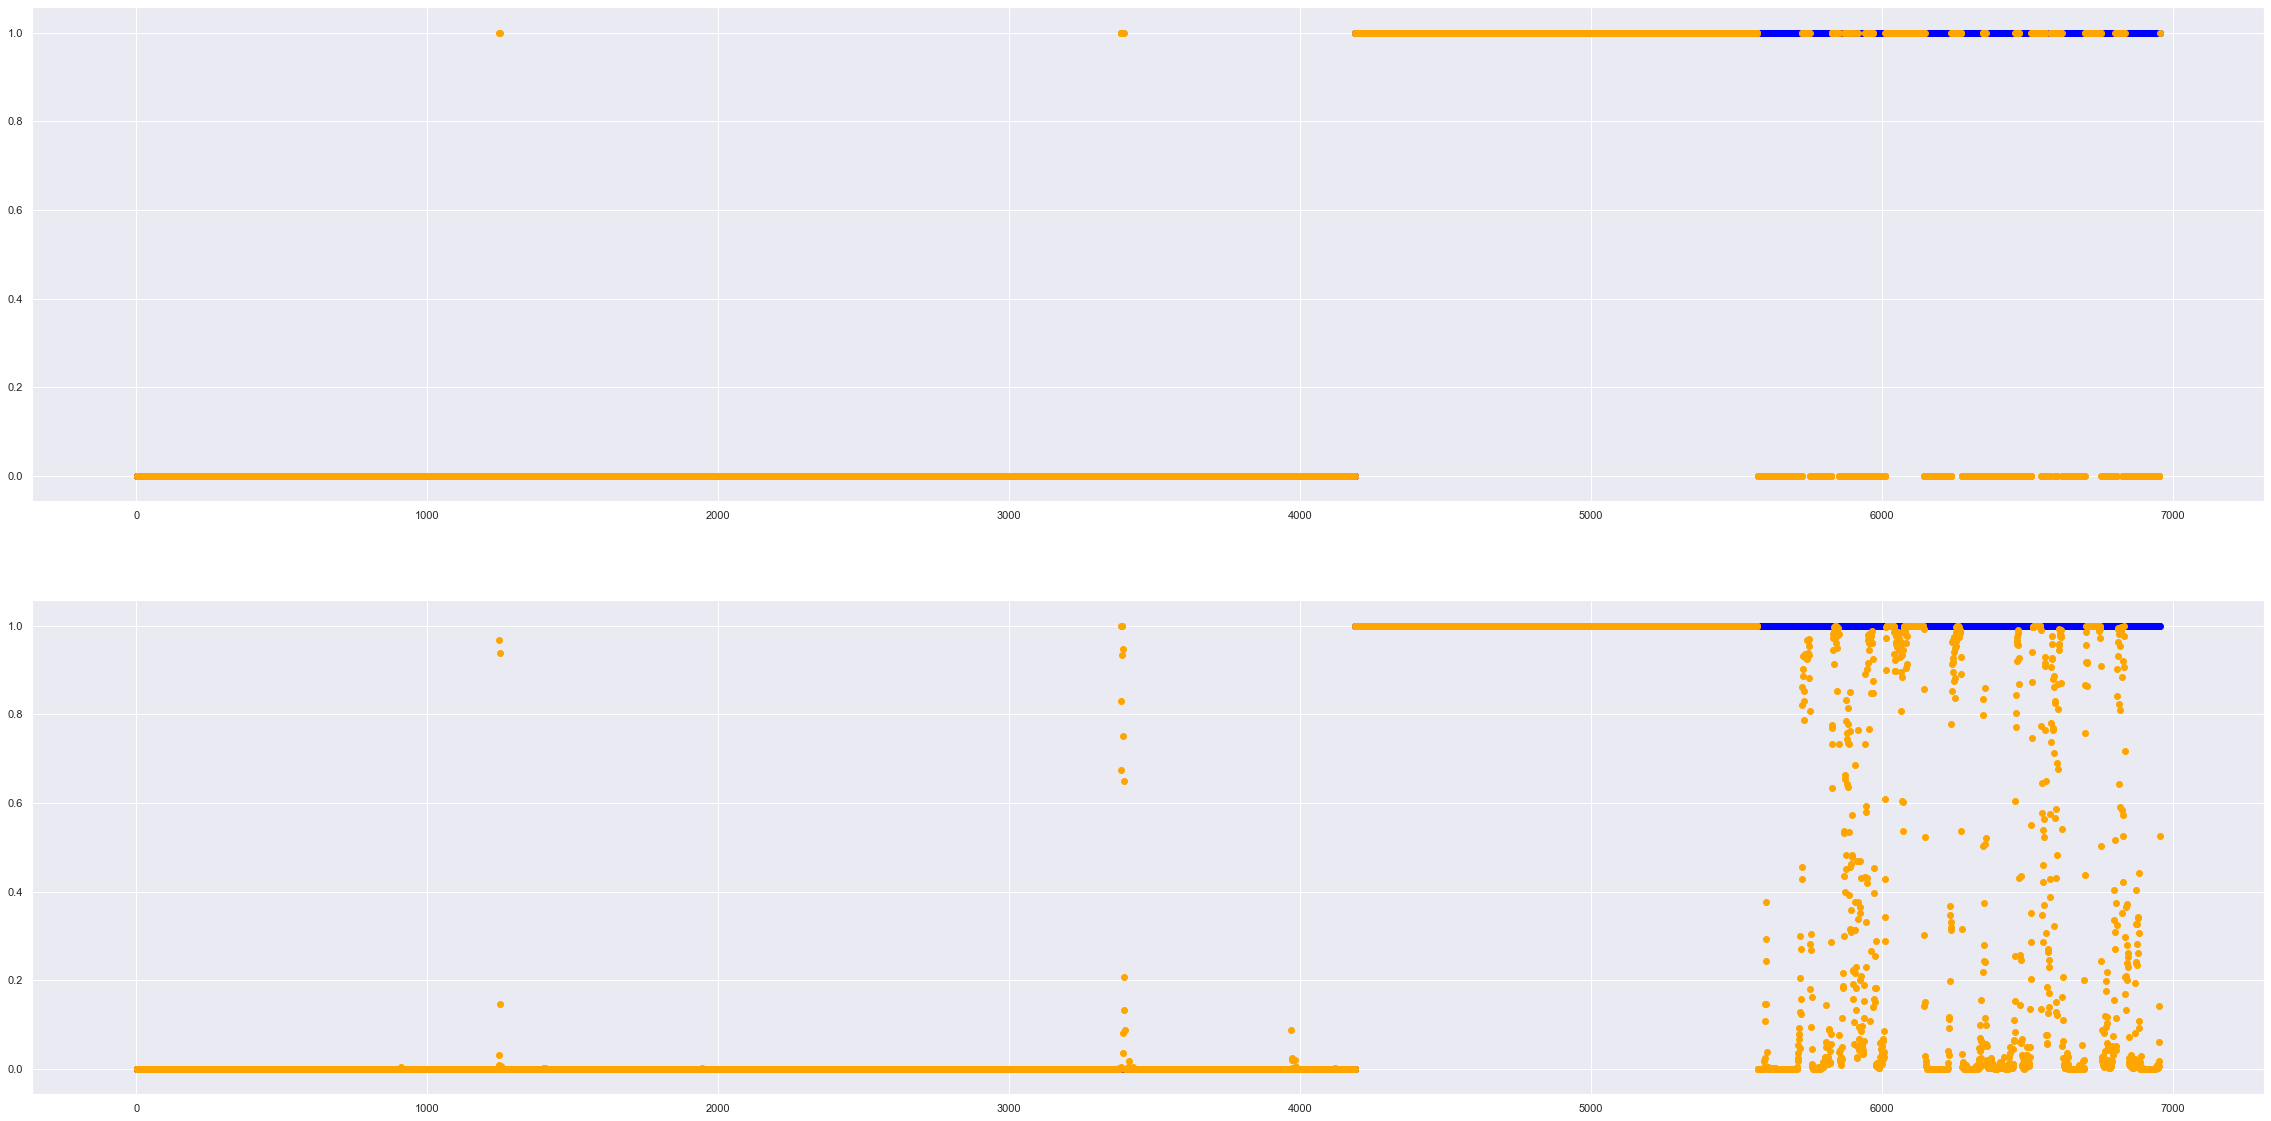

In [ ]:
fig , ax = plt.subplots(nrows = 2, figsize=(40,20))
ax[0].scatter(X, t_tl, color = 'blue')
ax[0].scatter(X, t_pl, color = 'orange')

ax[1].scatter(X, t_tl, color = 'blue')
ax[1].scatter(X, t_plp, color = 'orange')